# Data Preparation

In [1]:
# !pip install emoji demoji ftfy PySastrawi wordcloud

In [2]:
# Importing libraries for data preparation and visualization
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing warnings to ignore them
import warnings
warnings.filterwarnings("ignore")

# Importing libraries for pickle, json, and joblib files
import pickle
import json
import joblib
import copy

# Importing train_test_split for data splitting
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_csv('tweet.csv', index_col=0)
df

,sentimen,tweet
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp"
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"
...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦"


## Cek Duplikat Data

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  1815 non-null   object
 1   tweet     1815 non-null   object
dtypes: object(2)
memory usage: 42.5+ KB


## Cek Missing Value

In [7]:
df.isnull().sum()

sentimen    0
tweet       0
dtype: int64

In [8]:
df.sentimen.value_counts()

sentimen
positif    612
netral     607
negatif    596
Name: count, dtype: int64

## Data Splitting

In [9]:
# Separate the features (X) and the target variable (y)
X = df.drop(columns="sentimen")
y = df["sentimen"]

In [10]:
# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=123)

In [11]:
y_train.value_counts()

sentimen
positif    428
netral     425
negatif    417
Name: count, dtype: int64

In [12]:
# Split the training data into training and validation sets
X_test, X_valid, y_test, y_valid = train_test_split(X_test,
                                                    y_test,
                                                    test_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)

In [13]:
y_test.value_counts()

sentimen
positif    92
netral     91
negatif    89
Name: count, dtype: int64

In [14]:
y_valid.value_counts()

sentimen
positif    92
netral     91
negatif    90
Name: count, dtype: int64

# EDA

In [15]:
# Combine X_train, y_train into one DataFrame
train_set = pd.concat([X_train, y_train], axis=1)
train_set

,tweet,sentimen
499,"Pak, liat ini pak. @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar https://youtu.be/qlB7vg4I-ToÂ Tolong digajih team yg bikin film dokumenter sekeren iniðŸ˜­ Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((",netral
1674,"Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1)",negatif
1753,Prabowo Sandi menyerahkan gajinya untuk anak yatim & kaum duafa.aamiin #GueKapokPilihJokowi,netral
1353,"Mbak ini ekonomi yang ditopik jokowi pas itu ekonomi makro, yg dibahas udah derivatif ketiga, udh rata2 laju inflasi uang, bukan sekedar rakyat bisa beli spp ato gk. Klw mikirnya cuma sandang pangan papan Indonesia kapan majunya.",positif
1164,"Pak Dhe @Jokowi mengingatkan, perbedaan, keragaman dan kebhinekaan Indonesia harus dijaga dan dirawat bersama,Dasar negara kita Pancasila, NKRI, Bhinneka Tunggal Ika. UUD 1945. Sudah final. Harga mati dan tidak bisa diganggu gugatâ€œ https://twitter.com/jokowi/status/1117268796916396034?s=19Â â€¦",positif
...,...,...
877,"Makasih ya Allah.. skenario MU begitu Agung. Engkau hadirkan jaman cebong utk tunjukan para pengkhianat & munafik bangsa. kini disaat yg tepat Engkau beri obat nya. Prabowo Sandi ,Pertama kali dlm sejarah Asia Tenggara, Presiden menyedekahkan GAJI nya. #17April2019PeoplePower pic.twitter.com/yPk54WbPFh",positif
1662,Sandi sebut ia tidak akan mengambil gajinya jika ia menjabat sebagai cawapres. Sedang Prabowo sebut jangan politisasi UU Desa. #DebatCapres #Pilpres2019 pic.twitter.com/e97rQlRlRi,netral
800,Demokrat minta Prabowo hargai kontribusi Presiden Keenam SBY http://bit.ly/2KBo254Â,netral
865,Pancasila harga mati bravo pak presiden @jokowi pic.twitter.com/knQYLidaeC,positif


## Cek Emoticon

In [16]:
# Extract emoji
import emoji
import demoji
import ftfy

In [17]:
text_example = "16rb kl anda bl di agen langsung,,malah dapet 15rb...  Kl gas 18rb itu dr agen ,ke konsumen .....artinya orang jualan ya pasti cr untung,,itu namane perputaran roda ekonomiðŸ™\x8f"
print("Original:\n",text_example)
print("After fix:\n",ftfy.fix_text(text_example))

Original:
 16rb kl anda bl di agen langsung,,malah dapet 15rb...  Kl gas 18rb itu dr agen ,ke konsumen .....artinya orang jualan ya pasti cr untung,,itu namane perputaran roda ekonomiðŸ™
After fix:
 16rb kl anda bl di agen langsung,,malah dapet 15rb...  Kl gas 18rb itu dr agen ,ke konsumen .....artinya orang jualan ya pasti cr untung,,itu namane perputaran roda ekonomi🙏


In [21]:
# Kamus untuk penggantian emotikon (by ChatGPT)
emoticon_dict = {
    "☺": "senyum",
    "✊": "kepalan tangan",
    "✌": "peace",
    "✌️": "peace",
    "❤️": "cinta",
    "⭐": "bintang",
    "🇮🇩": "bendera Indonesia",
    "🇲🇨": "bendera Indonesia",
    "🏆": "piala",
    "👆": "tunjuk ke atas",
    "👆🏻": "tunjuk ke atas",
    "👇": "tunjuk ke bawah",
    "👈🏻": "tunjuk ke kiri",
    "👉": "tunjuk ke kanan",
    "👊": "kepalan tangan",
    "👍": "jempol",
    "👍🏻": "jempol",
    "👍🏿": "jempol",
    "👏": "tepuk tangan",
    "👧": "anak perempuan",
    "💕": "cinta",
    "💪": "berotot",
    "😀": "senyum lebar",
    "😁": "senyum lebar",
    "😂": "tertawa",
    "😃": "senang",
    "😄": "senang",
    "😅": "tertawa",
    "😆": "tertawa",
    "😇": "malaikat",
    "😊": "senang",
    "😋": "menjilat bibir",
    "😍": "jatuh cinta",
    "😎": "keren",
    "😑": "datar",
    "😓": "keringat",
    "😘": "ciuman",
    "😚": "ciuman",
    "😜": "nakal",
    "😢": "menangis",
    "😪": "mengantuk",
    "😬": "senyum canggung",
    "😭": "menangis",
    "😶": "diam",
    "🙂": "senyum",
    "🙄": "melirik",
    "🙈": "tidak melihat",
    "🙎": "cemberut",
    "🙏": "berdoa",
    "🙏🏽": "berdoa",
    "🤒": "sakit",
    "🤔": "berpikir",
    "🤕": "sakit",
    "🤗": "pelukan",
    "🤣": "tertawa terbahak-bahak",
    "🤦": "menepuk dahi (wanita)",
    "🤦🏻": "menepuk dahi (pria)",
    "🤧": "bersin",
    "🤪": "gila",
    "🤭": "menutup mulut",
    "🤲": "tangan terbuka",
    "😃": "senang",
    "😊": "senang",
    "😂": "tertawa",
    "😢": "menangis",
    "😡": "marah",
    "😍": "cinta",
    "😎": "keren",
    "😞": "sedih",
    "😄": "tertawa",
    "😉": "menyeringai",
    "😭": "menangis keras",
    "😜": "menggoda",
    "😒": "tidak senang",
    "😔": "tertekan",
    "😇": "baik hati",
    "😋": "lezat",
    "😱": "ketakutan",
    "😠": "marah",
    "😴": "mengantuk",
    "😅": "keringat dingin",
    "😆": "tertawa terbahak",
    "😘": "cium",
    "😗": "cium",
    "😙": "cium",
    "😚": "cium",
    "😐": "datar",
    "😑": "tidak senang",
    "😶": "tidak bicara",
    "🙄": "putar mata",
    "😏": "sinis",
    "😣": "frustrasi",
    "😥": "lega",
    "😮": "terkejut",
    "😯": "terkejut",
    "😪": "mengantuk",
    "😫": "lelah",
    "😴": "tidur",
    "😌": "lega",
    "😛": "menjulurkan lidah",
    "😜": "menjulurkan lidah",
    "😝": "menjulurkan lidah",
    "😒": "tidak senang",
    "😓": "keringat dingin",
    "😔": "sedih",
    "😕": "bingung",
    "😲": "terkejut",
    "😷": "sakit",
    "😺": "kucing senang",
    "😸": "kucing senang",
    "😹": "kucing tertawa",
    "😻": "kucing cinta",
    "😼": "kucing sinis",
    "😽": "kucing cium",
    "🙀": "kucing terkejut",
    "😿": "kucing sedih",
    "😾": "kucing marah",
    "👍": "jempol",
    "👎": "jempol turun",
    "👌": "ok",
    "✌": "damai",
    "👋": "halo",
    "👏": "tepuk tangan",
    "👐": "tangan terbuka",
    "🙏": "berdoa",
    "👊": "tinju",
    "✊": "angkat tinju",
    "🤛": "tinju kiri",
    "🤜": "tinju kanan",
    "🤞": "menyilangkan jari",
    "✋": "tangan terbuka",
    "🤚": "tangan terbuka",
    "🖐": "tangan terbuka",
    "🖖": "salute vulcan"
}

# cek emotikon dalam teks
def count_emotikon(text, emoticons_dict):
    text = ftfy.fix_text(text)
    emojis = emoji.emoji_list(text)
    if emojis:
      for j in emojis:
        list_of_emoji.append(j['emoji'])
    return len(emojis)

# cek emotikon dalam teks
def extract_emotikon(text):
    text = ftfy.fix_text(text)
    emojis = emoji.emoji_list(text)
    emojis_str = ""
    if emojis:
      return " ".join([i['emoji'] for i in emojis])
    else:
      return ""

list_of_emoji = []
train_set["count_emoji"] = train_set["tweet"].apply(lambda x: count_emotikon(x, emoticon_dict))

In [22]:
unique_emoji = list(set(list_of_emoji))

In [23]:
print(unique_emoji)

['👇', '😶', '🤦\u200d♀️', '🤪', '🙄', '😘', '👈🏻', '✊', '🙈', '💕', '😢', '😎', '🤦🏻\u200d♂️', '⭐', '😄', '🤔', '✌', '😇', '😆', '😁', '💪', '😅', '👆🏻', '😍', '🤣', '👊', '☺', '🤗', '😭', '🙏', '🤒', '👏', '✌️', '😬', '🤕', '🇮🇩', '👆', '🙎', '😃', '😚', '😊', '👍🏿', '👍', '🤭', '🏆', '😓', '🇲🇨', '😋', '🤧', '😀', '😂', '😑', '👧', '🙂', '🙏🏽', '👍🏻', '😪', '😜', '🤲', '❤️', '👉']


In [24]:
train_set["extract_emoji"] = train_set["tweet"].apply(lambda x: extract_emotikon(x))

In [25]:
train_set[train_set["extract_emoji"]!=""]

,tweet,sentimen,count_emoji,extract_emoji
499,"Pak, liat ini pak. @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar https://youtu.be/qlB7vg4I-ToÂ Tolong digajih team yg bikin film dokumenter sekeren iniðŸ˜­ Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((",netral,1,😭
256,"16rb kl anda bl di agen langsung,,malah dapet 15rb... Kl gas 18rb itu dr agen ,ke konsumen .....artinya orang jualan ya pasti cr untung,,itu namane perputaran roda ekonomiðŸ™",netral,1,🙏
673,"Kamu terlalu baik pak uno dan pak prabowo, komitmen gaji kalian gak kalian ambil. Padahal itu hak kalian. Semoga kalian amanah. Jangan lupa salam 2 jari, salam jak maniaðŸ‘†ðŸ»ðŸ‘†ðŸ» hahaha https://twitter.com/hirukhy_chiehan/status/1117311829783367680Â â€¦",positif,2,👆🏻 👆🏻
1584,Jadi cuma bisa kerja ART dan pengin gaji besar pergi ke Arab aja bu. Males lah yg beginian ðŸ˜ª,negatif,1,😪
249,"Anda sehat?pangkalan itu harga udah di tentukan mas,anda fkir saya bodoh,justru semenjak jokowi subsidi gas di kurangi di alih kan ke dana pkh tadi,jadi cuma Ä‘i bolak balik aja,gk perlu org pinter klw cuma mbolak balik subsidiðŸ˜‚",positif,1,😂
...,...,...,...,...
1704,"Sandi: TPS itu singkatan Tusuk Prabowo Sandi Mau dapet kerja? Tusuk Prabowo Sandi Mau hargaÂ² turun? Tusuk Prabowo Sandi Dll... Kalo mau nya doi ga cuek lagi, Tusuk Prabowo Sandi jg? ðŸ˜¶ #DebatPilpres2019",negatif,1,😶
1049,Janji manis para pilpres â¤ï¸ PKS menang : bebas pajak kendaraan Prabowo sandi menang : Gaji kerja untuk rakyat miskin Jokowi menang : Pengangguran Digaji.. Bagaimana kalau mereka di menangkan semua ðŸ˜‚,positif,2,❤️ 😂
0,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",negatif,2,👇 😜
965,"Pak @prabowo dan Bang @sandiuno niat gak ambil gaji kalo terpilih .. yg nyinyir langsung pada nararongol. ""Gaji mah kecil, tunjangannya gede!"" ""Sedekah kok dipamerin!"" ""Kampanye bawa2 agama!"" ""Amal gak diterima kalo pamer!"" Duh Gusti, gini amat hatred nya yak ðŸ¤¦â€â™€ï¸ðŸ¤¦â€â™€ï¸ #YourTurnBro",positif,2,🤦‍♀️ 🤦‍♀️


In [26]:
df_emoji = pd.DataFrame({"emoji":list_of_emoji})
df_emoji.to_csv("list_emoji.csv")

In [27]:
# Most Used Emoji
df_emoji.emoji.value_counts().head(10)

emoji
😂    72
😅    25
🤣    22
🙏    16
😍    13
😁    10
👍    10
😭     8
😜     8
😀     8
Name: count, dtype: int64

## Cek URL

In [28]:
def find_longest_word(tweet):
    words = tweet.split()
    longest_word = max(words, key=len)
    return longest_word

train_set['longest_word'] = train_set['tweet'].apply(find_longest_word)
train_set

,tweet,sentimen,count_emoji,extract_emoji,longest_word
499,"Pak, liat ini pak. @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar https://youtu.be/qlB7vg4I-ToÂ Tolong digajih team yg bikin film dokumenter sekeren iniðŸ˜­ Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((",netral,1,😭,https://youtu.be/qlB7vg4I-ToÂ
1674,"Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1)",negatif,0,,ekosistemnya.
1753,Prabowo Sandi menyerahkan gajinya untuk anak yatim & kaum duafa.aamiin #GueKapokPilihJokowi,netral,0,,#GueKapokPilihJokowi
1353,"Mbak ini ekonomi yang ditopik jokowi pas itu ekonomi makro, yg dibahas udah derivatif ketiga, udh rata2 laju inflasi uang, bukan sekedar rakyat bisa beli spp ato gk. Klw mikirnya cuma sandang pangan papan Indonesia kapan majunya.",positif,0,,derivatif
1164,"Pak Dhe @Jokowi mengingatkan, perbedaan, keragaman dan kebhinekaan Indonesia harus dijaga dan dirawat bersama,Dasar negara kita Pancasila, NKRI, Bhinneka Tunggal Ika. UUD 1945. Sudah final. Harga mati dan tidak bisa diganggu gugatâ€œ https://twitter.com/jokowi/status/1117268796916396034?s=19Â â€¦",positif,0,,https://twitter.com/jokowi/status/1117268796916396034?s=19Â
...,...,...,...,...,...
877,"Makasih ya Allah.. skenario MU begitu Agung. Engkau hadirkan jaman cebong utk tunjukan para pengkhianat & munafik bangsa. kini disaat yg tepat Engkau beri obat nya. Prabowo Sandi ,Pertama kali dlm sejarah Asia Tenggara, Presiden menyedekahkan GAJI nya. #17April2019PeoplePower pic.twitter.com/yPk54WbPFh",positif,0,,pic.twitter.com/yPk54WbPFh
1662,Sandi sebut ia tidak akan mengambil gajinya jika ia menjabat sebagai cawapres. Sedang Prabowo sebut jangan politisasi UU Desa. #DebatCapres #Pilpres2019 pic.twitter.com/e97rQlRlRi,netral,0,,pic.twitter.com/e97rQlRlRi
800,Demokrat minta Prabowo hargai kontribusi Presiden Keenam SBY http://bit.ly/2KBo254Â,netral,0,,http://bit.ly/2KBo254Â
865,Pancasila harga mati bravo pak presiden @jokowi pic.twitter.com/knQYLidaeC,positif,0,,pic.twitter.com/knQYLidaeC


In [29]:
# Pola regex untuk URL
url_pattern = r'https?://\S+|pic.twitter.com/\S+'

# Mengecek setiap teks dalam train_set dan menampilkan yang mengandung URL
rows_with_url = train_set[train_set['tweet'].str.contains(url_pattern, regex=True)]

# Fungsi untuk mengekstrak URL dari teks
def extract_url(teks):
    urls = re.findall(url_pattern, teks)
    return ', '.join(urls) if urls else None

# Menambahkan kolom 'urls' ke DataFrame
if not rows_with_url.empty:
    rows_with_url['urls'] = rows_with_url['tweet'].apply(extract_url)
    print("Baris yang mengandung URL dan URL-nya:")
    print(rows_with_url[['tweet','urls']])
else:
    print("Dataset tidak mengandung URL.")

Baris yang mengandung URL dan URL-nya:
                                                                                                                                                                                                                                                                                                                  tweet  \
499                                            Pak, liat ini pak.  @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar  https://youtu.be/qlB7vg4I-ToÂ    Tolong digajih team yg bikin film dokumenter sekeren iniðŸ˜­  Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((   
1164        Pak Dhe  @Jokowi mengingatkan, perbedaan, keragaman dan kebhinekaan Indonesia harus dijaga dan dirawat bersama,Dasar negara kita Pancasila, NKRI, Bhinneka Tunggal Ika. UUD 1945. Sudah final. Harga mati dan tidak bisa diganggu gugatâ€œ  https://twitter.com/jokowi/status/1117268796916396034?s=19Â â€¦   
946             

## Cek Username

In [30]:
# Pola regex untuk username
username_pattern = r'@\w+'

# Mengecek setiap teks dalam train_set dan menampilkan yang mengandung username
rows_with_username = train_set[train_set['tweet'].str.contains(username_pattern, regex=True)]

# Fungsi untuk mengekstrak username dari teks
list_username = []
def extract_username(teks):
    usernames = re.findall(username_pattern, teks)
    if usernames:
        for i in usernames:
            list_username.append(i)
        return ', '.join(usernames)
    else:
        return None

# Menambahkan kolom 'usernames' ke DataFrame
if not rows_with_username.empty:
    rows_with_username['usernames'] = rows_with_username['tweet'].apply(lambda x:extract_username(x))
    print("Baris yang mengandung username dan hasil ekstraksinya:")
    print(rows_with_username[['tweet','usernames']])
else:
    print("Dataset tidak mengandung username.")

Baris yang mengandung username dan hasil ekstraksinya:
                                                                                                                                                                                                                                                                                                            tweet  \
499                                      Pak, liat ini pak.  @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar  https://youtu.be/qlB7vg4I-ToÂ    Tolong digajih team yg bikin film dokumenter sekeren iniðŸ˜­  Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, keragaman dan kebhinekaan Indonesia harus dijaga dan dirawat bersama,Dasar negara kita Pancasila, NKRI, Bhinneka Tunggal Ika. UUD 1945. Sudah final. Harga mati dan tidak bisa diganggu gugatâ€œ  https://twitter.com/jokowi/status/1117268796916396034?s=19Â â€¦   
986               

In [31]:
# Number of username mentioned
len(list_username)

555

In [32]:
df_username = pd.DataFrame({"username":list_username})

<Axes: xlabel='username'>

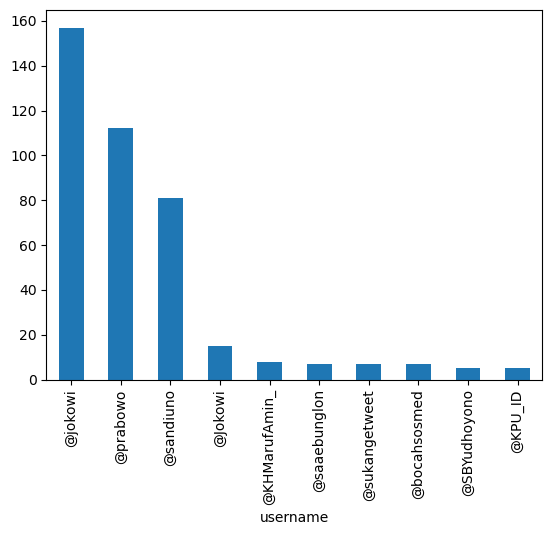

In [33]:
# Most mentioned username
df_username.username.value_counts().head(10).plot(kind='bar')

## Cek Punctuation

In [34]:
# Pola regex untuk punctuation
punctuation_pattern = r'[^\w\s@]'

# Mengecek setiap teks dalam train_set dan menampilkan yang mengandung punctuation
rows_with_punctuation = train_set[train_set['tweet'].str.contains(punctuation_pattern, regex=True)]

# Fungsi untuk mengekstrak punctuation dari teks
def extract_punctuation(teks):
    punctuations = re.findall(punctuation_pattern, teks)
    return ', '.join(punctuations) if punctuations else None

# Menambahkan kolom 'punctuations' ke DataFrame
if not rows_with_punctuation.empty:
    rows_with_punctuation['punctuations'] = rows_with_punctuation['tweet'].apply(extract_punctuation)
    print("Baris yang mengandung punctuation dan hasil ekstraksinya:")
    print(rows_with_punctuation[['tweet','punctuations']])
else:
    print("Dataset tidak mengandung punctuation.")

Baris yang mengandung punctuation dan hasil ekstraksinya:
                                                                                                                                                                                                                                                                                                                  tweet  \
499                                            Pak, liat ini pak.  @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar  https://youtu.be/qlB7vg4I-ToÂ    Tolong digajih team yg bikin film dokumenter sekeren iniðŸ˜­  Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((   
1674                                                        Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1) 

## Cek Hastag

In [35]:
# Pola regex untuk hashtag
hashtag_pattern = r'#\w+'

# Mengecek setiap teks dalam train_set dan menampilkan yang mengandung hashtag
rows_with_hashtag = train_set[train_set['tweet'].str.contains(hashtag_pattern, regex=True)]

# Fungsi untuk mengekstrak hashtag dari teks
list_hashtag = []
def extract_hashtag(teks):
    hashtags = re.findall(hashtag_pattern, teks)
    if hashtags:
        for i in hashtags:
            list_hashtag.append(i)
    return ', '.join(hashtags) if hashtags else None

# Menambahkan kolom 'hashtags' ke DataFrame
if not rows_with_hashtag.empty:
    rows_with_hashtag['hashtags'] = rows_with_hashtag['tweet'].apply(extract_hashtag)
    print("Baris yang mengandung hashtag dan hasil ekstraksinya:")
    print(rows_with_hashtag[['tweet','hashtags']])
else:
    print("Dataset tidak mengandung hashtag.")

Baris yang mengandung hashtag dan hasil ekstraksinya:
                                                                                                                                                                                                                                                                                                                  tweet  \
1753                                                                                                                                                                                                                        Prabowo Sandi menyerahkan gajinya untuk anak yatim & kaum duafa.aamiin #GueKapokPilihJokowi   
986                                                                                                                                      Anak muda sekarang banyak yang sudah berkecimpung dalam dunia digital maka @jokowi terus akan memperbaiki sistem ekonomi digital agar lebih baik lagi. #JokowiMenangTotalDebat   
1

In [36]:
# Number of hashtag used
len(list_hashtag)

662

In [37]:
df_hashtag = pd.DataFrame({"hashtag":list_hashtag})

<Axes: xlabel='hashtag'>

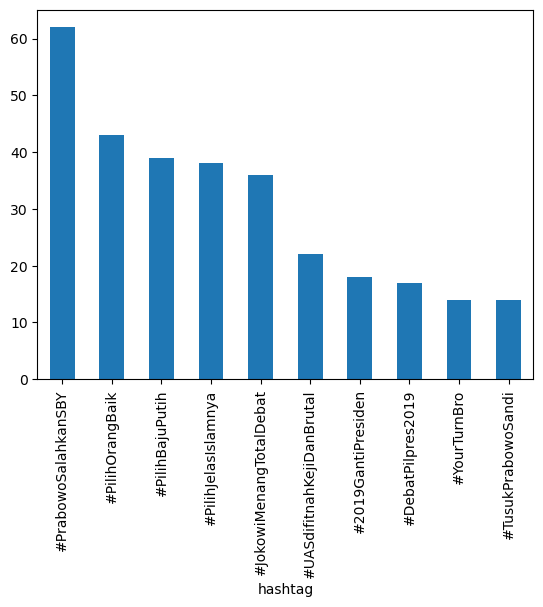

In [38]:
# Most used hashtag
df_hashtag.hashtag.value_counts().head(10).plot(kind='bar')

## Cek Alfanumerik

In [39]:
# Pola regex untuk alfanumerik
alnum_pattern = r'\w+'

# Mengecek setiap teks dalam train_set dan menampilkan yang mengandung alfanumerik
rows_with_alnum = train_set[train_set['tweet'].str.contains(alnum_pattern, regex=True)]

# Fungsi untuk mengekstrak alfanumerik dari teks
def extract_alnum(teks):
    alnums = re.findall(alnum_pattern, teks)
    return ', '.join(alnums) if alnums else None

# Menambahkan kolom 'alphanumeric' ke DataFrame
if not rows_with_alnum.empty:
    rows_with_alnum['alphanumeric'] = rows_with_alnum['tweet'].apply(extract_alnum)
    print("Baris yang mengandung alfanumerik dan hasil ekstraksinya:")
    print(rows_with_alnum[['tweet','alphanumeric']])
else:
    print("Dataset tidak mengandung alfanumerik.")

Baris yang mengandung alfanumerik dan hasil ekstraksinya:
                                                                                                                                                                                                                                                                                                                  tweet  \
499                                            Pak, liat ini pak.  @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar  https://youtu.be/qlB7vg4I-ToÂ    Tolong digajih team yg bikin film dokumenter sekeren iniðŸ˜­  Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((   
1674                                                        Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1) 

## Cek Special Characters

In [40]:
# Pola regex untuk karakter khusus (special characters)
special_char_pattern = r'[^a-zA-Z0-9\s]'

# Mengecek setiap teks dalam train_set dan menampilkan yang mengandung karakter khusus
rows_with_special_char = train_set[train_set['tweet'].str.contains(special_char_pattern, regex=True)]

# Fungsi untuk mengekstrak karakter khusus dari teks
def extract_special_char(teks):
    special_chars = re.findall(special_char_pattern, teks)
    return ', '.join(special_chars) if special_chars else None

# Menambahkan kolom 'special_characters' ke DataFrame
if not rows_with_special_char.empty:
    rows_with_special_char['special_characters'] = rows_with_special_char['tweet'].apply(extract_special_char)
    print("Baris yang mengandung karakter khusus dan hasil ekstraksinya:")
    print(rows_with_special_char[['tweet','special_characters']])
else:
    print("Dataset tidak mengandung karakter khusus.")

Baris yang mengandung karakter khusus dan hasil ekstraksinya:
                                                                                                                                                                                                                                                                                                                  tweet  \
499                                            Pak, liat ini pak.  @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar  https://youtu.be/qlB7vg4I-ToÂ    Tolong digajih team yg bikin film dokumenter sekeren iniðŸ˜­  Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((   
1674                                                        Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, 

## Cek Numerik

In [41]:
# Pola regex untuk angka numerik
numeric_pattern = r'\d+'

# Mengecek setiap teks dalam train_set dan menampilkan yang mengandung angka numerik
rows_with_numeric = train_set[train_set['tweet'].str.contains(numeric_pattern, regex=True)]

# Fungsi untuk mengekstrak angka numerik dari teks
def extract_numeric(teks):
    numerics = re.findall(numeric_pattern, teks)
    return ', '.join(numerics) if numerics else None

# Menambahkan kolom 'numerics' ke DataFrame
if not rows_with_numeric.empty:
    rows_with_numeric['numerics'] = rows_with_numeric['tweet'].apply(extract_numeric)
    print("Baris yang mengandung angka numerik dan hasil ekstraksinya:")
    print(rows_with_numeric[['tweet','numerics']])
else:
    print("Dataset tidak mengandung angka numerik.")

Baris yang mengandung angka numerik dan hasil ekstraksinya:
                                                                                                                                                                                                                                                                                                                  tweet  \
499                                            Pak, liat ini pak.  @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar  https://youtu.be/qlB7vg4I-ToÂ    Tolong digajih team yg bikin film dokumenter sekeren iniðŸ˜­  Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((   
1674                                                        Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1

## Cek Double Space

In [42]:
# Pola regex untuk spasi ganda
double_space_pattern = r'\s\s+'

# Mengecek setiap teks dalam train_set dan menampilkan yang mengandung spasi ganda
rows_with_double_space = train_set[train_set['tweet'].str.contains(double_space_pattern, regex=True)]

# Fungsi untuk mengekstrak spasi ganda dari teks
def extract_double_space(teks):
    double_spaces = re.findall(double_space_pattern, teks)
    return ', '.join(double_spaces) if double_spaces else None

# Menambahkan kolom 'double_spaces' ke DataFrame
if not rows_with_double_space.empty:
    rows_with_double_space['double_spaces'] = rows_with_double_space['tweet'].apply(extract_double_space)
    print("Baris yang mengandung spasi ganda dan hasil ekstraksinya:")
    print(rows_with_double_space[['tweet','double_spaces']])
else:
    print("Dataset tidak mengandung spasi ganda.")

Baris yang mengandung spasi ganda dan hasil ekstraksinya:
                                                                                                                                                                                                                                                                                                                  tweet  \
499                                            Pak, liat ini pak.  @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar  https://youtu.be/qlB7vg4I-ToÂ    Tolong digajih team yg bikin film dokumenter sekeren iniðŸ˜­  Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((   
1353                                                                            Mbak ini ekonomi yang ditopik jokowi pas itu ekonomi makro, yg dibahas udah derivatif ketiga, udh rata2 laju inflasi uang, bukan sekedar rakyat bisa beli spp ato gk.   Klw mikirnya cuma sandang pangan papan Indonesia kapan majunya. 

## Cek Stopwords

In [43]:
import nltk
from collections import Counter

# Mengunduh stopwords bahasa Indonesia dari NLTK jika belum diunduh
nltk.download('stopwords')
from nltk.corpus import stopwords

# Mengambil stopwords bahasa Indonesia dari NLTK
stopwords_indonesia = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
# Fungsi untuk mengekstrak stopwords dari teks
def extract_stopwords(teks):
    words = teks.split()
    stopwords_in_text = [word for word in words if word.lower() in stopwords_indonesia]
    return ', '.join(stopwords_in_text) if stopwords_in_text else None

# Mengecek setiap teks dalam train_set dan menambahkan kolom 'stopwords'
train_set['stopwords'] = train_set['tweet'].apply(extract_stopwords)

# Menampilkan baris yang mengandung stopwords
rows_with_stopwords = train_set[train_set['stopwords'].notnull()]

if not rows_with_stopwords.empty:
    print("Baris yang mengandung stopwords dan hasil ekstraksinya:")
    print(rows_with_stopwords[['tweet','stopwords']])
else:
    print("Dataset tidak mengandung stopwords.")

Baris yang mengandung stopwords dan hasil ekstraksinya:
                                                                                                                                                                                                                                                                                                                  tweet  \
499                                            Pak, liat ini pak.  @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar  https://youtu.be/qlB7vg4I-ToÂ    Tolong digajih team yg bikin film dokumenter sekeren iniðŸ˜­  Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((   
1674                                                        Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1)   

In [45]:
# Menghitung frekuensi kemunculan stopwords
all_stopwords = ' '.join(rows_with_stopwords['stopwords'].dropna()).split(', ')
stopwords_counter = Counter(all_stopwords)

# Menampilkan stopwords yang paling banyak muncul
most_common_stopwords = stopwords_counter.most_common()
print("\nStopwords terbanyak dalam train_set:")
for word, count in most_common_stopwords:
    print(f"{word}: {count}")


Stopwords terbanyak dalam train_set:
dan: 362
di: 260
yang: 153
itu: 149
akan: 148
tidak: 138
ini: 135
pak: 118
dari: 98
bisa: 92
untuk: 92
jadi: 82
ke: 80
ada: 79
saya: 76
kita: 72
mau: 71
bukan: 69
tapi: 66
dengan: 65
Pak: 63
sudah: 59
lebih: 57
sama: 55
juga: 53
dalam: 49
mereka: 45
hanya: 43
dia: 43
seperti: 41
kalau: 40
saat: 39
apa: 38
semua: 38
adalah: 38
karena: 38
kami: 38
banyak: 37
sangat: 37
anda: 36
cuma: 34
tak: 34
menjadi: 34
masih: 33
pada: 33
kan: 32
jika: 32
tahun: 29
oleh: 29
soal: 28
harus: 28
lagi: 28
bahwa: 28
sebagai: 27
satu: 27
buat: 26
pernah: 25
sebelum: 24
para: 24
atau: 24
Mau: 24
pasti: 24
ingin: 24
jelas: 23
punya: 23
pun: 23
Dan: 23
sekarang: 22
malah: 22
selama: 22
baru: 21
baik: 21
telah: 21
memang: 21
bapak: 21
saja: 21
masalah: 20
mampu: 20
hal: 19
Akan: 19
Dia: 19
masa: 19
terus: 18
besar: 18
bagi: 18
Tapi: 18
kepada: 18
dulu: 17
kalian: 17
sampai: 17
tanpa: 17
memberikan: 17
perlu: 16
Jika: 16
secara: 15
Tak: 15
belum: 15
mana: 15
kok: 15
mengatak

## Cek Slang

In [46]:
# Membaca file bahasa_gaul_indonesia.txt dan memuatnya ke dalam set untuk singkatan
slang_set = set()
with open('bahasa_gaul_indonesia.txt', 'r') as file:
    for line in file:
        slang = line.strip().split('\t')[0].lower()
        slang_set.add(slang)

In [47]:
# Mengubah teks dalam train_set['tweet'] menjadi lowercase
train_set['tweet_lower'] = train_set['tweet'].str.lower()

# Fungsi untuk mengekstrak kata-kata singkatan dari teks
def extract_slang(teks):
    words = teks.split()
    slang_in_text = [word for word in words if word in slang_set]
    return ', '.join(slang_in_text) if slang_in_text else None

# Mengecek setiap teks dalam train_set dan menambahkan kolom 'slang_words'
train_set['slang_words'] = train_set['tweet_lower'].apply(extract_slang)

# Menampilkan baris yang mengandung kata-kata singkatan
rows_with_slang = train_set[train_set['slang_words'].notnull()]

if not rows_with_slang.empty:
    print("Baris yang mengandung kata-kata singkatan dan hasil ekstraksinya:")
    print(rows_with_slang[['tweet', 'slang_words']])
else:
    print("Dataset tidak mengandung kata-kata singkatan.")

Baris yang mengandung kata-kata singkatan dan hasil ekstraksinya:
                                                                                                                                                                                                                                                                                                                  tweet  \
499                                            Pak, liat ini pak.  @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar  https://youtu.be/qlB7vg4I-ToÂ    Tolong digajih team yg bikin film dokumenter sekeren iniðŸ˜­  Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((   
1674                                                        Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif i

## Class Distribution

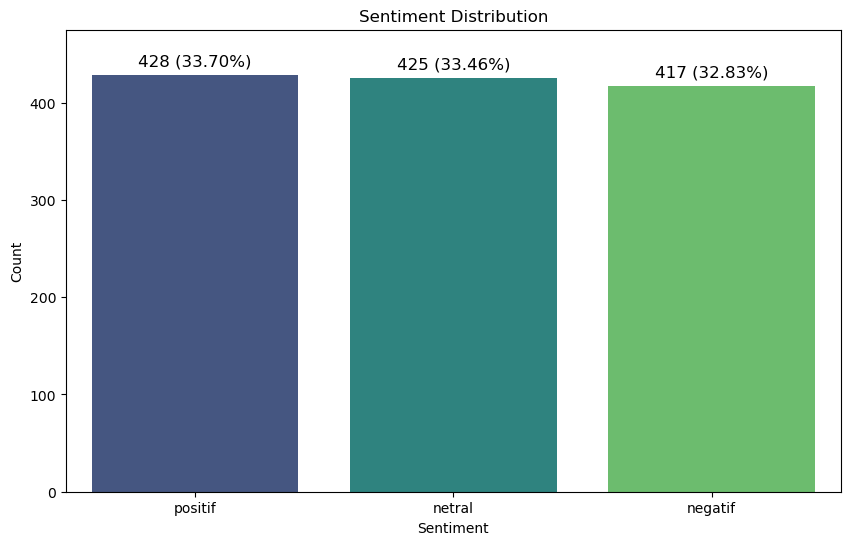

In [48]:
# Calculate value counts and percentages
value_counts = train_set['sentimen'].value_counts()
percentages = train_set['sentimen'].value_counts(normalize=True) * 100

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=plot_data.index, y='Count', data=plot_data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.ylim(0, 475)

# Add counts and percentages on top of bars
for i in range(len(plot_data)):
    count = plot_data['Count'][i]
    percentage = plot_data['Percentage'][i]
    plt.text(i, count + 10, f'{count} ({percentage:.2f}%)', ha='center', fontsize=12)

plt.show()

## Mencari baris dengan jumlah kata pada tweet yang paling panjang

In [49]:
def count_words(tweet):
    return len(tweet.split())

In [50]:
train_set['word_count'] = train_set['tweet'].apply(count_words)
train_set

,tweet,sentimen,count_emoji,extract_emoji,longest_word,stopwords,tweet_lower,slang_words,word_count
499,"Pak, liat ini pak. @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar https://youtu.be/qlB7vg4I-ToÂ Tolong digajih team yg bikin film dokumenter sekeren iniðŸ˜­ Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((",netral,1,😭,https://youtu.be/qlB7vg4I-ToÂ,"ini, dan, sering, dan","pak, liat ini pak. @jokowi @prabowo @chilli_pari @sandiuno @kaesangp @luhutbinsar https://youtu.be/qlb7vg4i-toâ tolong digajih team yg bikin film dokumenter sekeren iniðÿ˜­ bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((","liat, yg, bikin, bikin, nangis, banget, cabut",34
1674,"Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1)",negatif,0,,ekosistemnya.,"Anda, kecil, pak, mau, bukan, soal, tapi, banyak, sekali, di, Pak, mau, apa, pak, soal","scope berpikir anda kecil sekali. yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. pemain ml, dota, ff, pubg banyak sekali yg berbasis di indo. pak jokowi mau tau apa tanggapan pak prabowo soal potensi dr ekonomi kreatif ini, (1)","anda, yg, mau, yg, mau, tau, dr",42
1753,Prabowo Sandi menyerahkan gajinya untuk anak yatim & kaum duafa.aamiin #GueKapokPilihJokowi,netral,0,,#GueKapokPilihJokowi,untuk,prabowo sandi menyerahkan gajinya untuk anak yatim & kaum duafa.aamiin #guekapokpilihjokowi,None,11
1353,"Mbak ini ekonomi yang ditopik jokowi pas itu ekonomi makro, yg dibahas udah derivatif ketiga, udh rata2 laju inflasi uang, bukan sekedar rakyat bisa beli spp ato gk. Klw mikirnya cuma sandang pangan papan Indonesia kapan majunya.",positif,0,,derivatif,"ini, yang, itu, bukan, bisa, cuma, kapan","mbak ini ekonomi yang ditopik jokowi pas itu ekonomi makro, yg dibahas udah derivatif ketiga, udh rata2 laju inflasi uang, bukan sekedar rakyat bisa beli spp ato gk. klw mikirnya cuma sandang pangan papan indonesia kapan majunya.","pas, itu, yg, udah, udh, ato, klw",37
1164,"Pak Dhe @Jokowi mengingatkan, perbedaan, keragaman dan kebhinekaan Indonesia harus dijaga dan dirawat bersama,Dasar negara kita Pancasila, NKRI, Bhinneka Tunggal Ika. UUD 1945. Sudah final. Harga mati dan tidak bisa diganggu gugatâ€œ https://twitter.com/jokowi/status/1117268796916396034?s=19Â â€¦",positif,0,,https://twitter.com/jokowi/status/1117268796916396034?s=19Â,"Pak, dan, harus, dan, kita, Sudah, dan, tidak, bisa","pak dhe @jokowi mengingatkan, perbedaan, keragaman dan kebhinekaan indonesia harus dijaga dan dirawat bersama,dasar negara kita pancasila, nkri, bhinneka tunggal ika. uud 1945. sudah final. harga mati dan tidak bisa diganggu gugatâ€œ https://twitter.com/jokowi/status/1117268796916396034?s=19â â€¦",None,34
...,...,...,...,...,...,...,...,...,...
877,"Makasih ya Allah.. skenario MU begitu Agung. Engkau hadirkan jaman cebong utk tunjukan para pengkhianat & munafik bangsa. kini disaat yg tepat Engkau beri obat nya. Prabowo Sandi ,Pertama kali dlm sejarah Asia Tenggara, Presiden menyedekahkan GAJI nya. #17April2019PeoplePower pic.twitter.com/yPk54WbPFh",positif,0,,pic.twitter.com/yPk54WbPFh,"begitu, para, kini, tepat, beri","makasih ya allah.. skenario mu begitu agung. engkau hadirkan jaman cebong utk tunjukan para pengkhianat & munafik bangsa. kini disaat yg tepat engkau beri obat nya. prabowo sandi ,pertama kali dlm sejarah asia tenggara, presiden menyedekahkan gaji nya. #17april2019peoplepower pic.twitter.com/ypk54wbpfh","makasih, ya, utk, yg, dlm",40
1662,Sandi sebut ia tidak akan mengambil gajinya jika ia menjabat sebagai cawapres. Sedang Prabowo sebut jangan politisasi UU Desa. #DebatCapres #Pilpres2019 pic.twitter.com/e97rQlRlRi,netral,0,,pic.twitter.com/e97rQlRlRi,"sebut, ia, tidak, akan, jika, ia, sebagai, Sedang, sebut, jangan",sa

In [51]:
train_set_sorted = train_set.sort_values(by='word_count', ascending=False)
train_set_sorted

,tweet,sentimen,count_emoji,extract_emoji,longest_word,stopwords,tweet_lower,slang_words,word_count
888,"Argumen Jokowi sangat make sense drpd yg satu itu setiap debat kata si A di daerah ini si B di daerah itu, ini sangat ketauan yg satu itu tdk paham ekonomi negara. Dan skrg minta rakyat milih dia yg hanya paham ekonomi sebatas perusahaan. Jgn membodoi warga dgn kata2 ibu ini itu.",positif,0,,perusahaan.,"sangat, satu, itu, setiap, kata, di, ini, di, ini, sangat, satu, itu, Dan, minta, dia, hanya, ibu, ini","argumen jokowi sangat make sense drpd yg satu itu setiap debat kata si a di daerah ini si b di daerah itu, ini sangat ketauan yg satu itu tdk paham ekonomi negara. dan skrg minta rakyat milih dia yg hanya paham ekonomi sebatas perusahaan. jgn membodoi warga dgn kata2 ibu ini itu.","make, drpd, yg, itu, ketauan, yg, itu, tdk, skrg, yg, jgn, dgn",52
890,"Dr ini aja kita"" dah bisa ambil kesimpulan klo ulama"" jg ustad"" y itu berbayar dn mulut y disogok smua. Cuma @prabowo jg hrus dong byr gaji"" karyawan y,jgn hny krn ingin jd RI 1 suap orang sana sini, smntara bkas karyawan y kelaparan dgn anak istri y. Tul g @Fahrihamzah @fadlizon",negatif,0,,@Fahrihamzah,"ini, bisa, itu, Cuma, dong, ingin, sana","dr ini aja kita"" dah bisa ambil kesimpulan klo ulama"" jg ustad"" y itu berbayar dn mulut y disogok smua. cuma @prabowo jg hrus dong byr gaji"" karyawan y,jgn hny krn ingin jd ri 1 suap orang sana sini, smntara bkas karyawan y kelaparan dgn anak istri y. tul g @fahrihamzah @fadlizon","dr, aja, dah, klo, jg, y, itu, y, jg, hrus, dong, byr, hny, krn, jd, y, dgn, g",52
1072,Bahas ekonomi sekelas 02 dan wakilnya .Gak faham antara ekonomi mikro . Yg ditemui sandi memang sdh jelas pandangan politik nya .Jadi sdh jelas pandangan nya . Padahal kalo bicara uang 100 ribu dapet aja udah nipu . TDL untuk rakyat miskin 450 watt tdk pernah naik . Sandi bohong,negatif,0,,pandangan,"dan, antara, memang, jelas, jelas, Padahal, untuk, pernah, naik",bahas ekonomi sekelas 02 dan wakilnya .gak faham antara ekonomi mikro . yg ditemui sandi memang sdh jelas pandangan politik nya .jadi sdh jelas pandangan nya . padahal kalo bicara uang 100 ribu dapet aja udah nipu . tdl untuk rakyat miskin 450 watt tdk pernah naik . sandi bohong,"yg, sdh, sdh, kalo, dapet, aja, udah, nipu, tdk",50
648,"Boss.. ga usah ngomong soal yg ente ga kuasain.. sori bahasa ente bloon.. Mau soal BUMN, data, pengangguran, ekonomi apalagi politik. Pasal karet aja lo ga ngerti siapa yg buat bisa diterapin apa gak.. kalo ada UU dan delik aduan ada, UU bisa jalan ehh lo bilang otoriter DONGOK!",negatif,0,,"pengangguran,","usah, soal, Mau, soal, apalagi, siapa, buat, bisa, apa, ada, dan, bisa","boss.. ga usah ngomong soal yg ente ga kuasain.. sori bahasa ente bloon.. mau soal bumn, data, pengangguran, ekonomi apalagi politik. pasal karet aja lo ga ngerti siapa yg buat bisa diterapin apa gak.. kalo ada uu dan delik aduan ada, uu bisa jalan ehh lo bilang otoriter dongok!","ga, usah, ngomong, yg, ente, ga, ente, mau, aja, lo, ga, ngerti, yg, buat, kalo, lo, bilang",49
538,Lah kalian yg mulai kata nya klo gak milih jokowi gak bleh naik tol pas lebaran. Kalian lupa lwt tol bayar pembangunan tol dari pajak rakyat.. hasil ngutang jga yg bayar rakyat emang jokowi doang yg bayar mikir. 1 lgi gw cma pengen memperjelas maksud klian bkn menyerang kalian,negatif,0,,pembangunan,"Lah, kalian, mulai, kata, naik, Kalian, dari, kalian",lah kalian yg mulai kata nya klo gak milih jokowi gak bleh naik tol pas lebaran. kalian lupa lwt tol bayar pembangunan tol dari pajak rakyat.. hasil ngutang jga yg bayar rakyat emang jokowi doang yg bayar mikir. 1 lgi gw cma pengen memperjelas maksud klian bkn menyerang kalian,"yg, klo, gak, gak, pas, lwt, jga, yg, emang, doang, yg, lgi, gw, cma, pengen, klian, bkn",49
...,...,...,...,...,...,...,...,...,...
1405,Ahaha dikuliahin pakde ekonomi makro....,positif,0,,dikuliahin,None,ahaha dikuliahin pakde ekonomi makro....,ahaha,5
115,madura prabowo harga mati ðŸ‘†ðŸ»ðŸ‘ˆ

In [52]:
train_set_sorted.loc[888, 'tweet']

'Argumen Jokowi sangat make sense drpd yg satu itu setiap debat kata si A di daerah ini si B di daerah itu, ini sangat ketauan yg satu itu tdk paham ekonomi negara. Dan skrg minta rakyat milih dia yg hanya paham ekonomi sebatas perusahaan. Jgn membodoi warga dgn kata2 ibu ini itu.'

In [53]:
train_set_sorted.loc[890, 'tweet']

'Dr ini aja kita" dah bisa ambil kesimpulan klo ulama" jg ustad" y itu berbayar dn mulut y disogok smua. Cuma @prabowo jg hrus dong byr gaji" karyawan y,jgn hny krn ingin jd RI 1 suap orang sana sini, smntara bkas karyawan y kelaparan dgn anak istri y. Tul g @Fahrihamzah @fadlizon'

In [54]:
train_set_sorted.loc[1072, 'tweet']

'Bahas ekonomi sekelas 02 dan wakilnya .Gak faham antara ekonomi mikro . Yg ditemui sandi memang sdh jelas pandangan politik nya .Jadi sdh jelas pandangan nya . Padahal kalo bicara uang 100 ribu dapet aja udah nipu . TDL untuk rakyat miskin 450 watt tdk pernah naik . Sandi bohong'

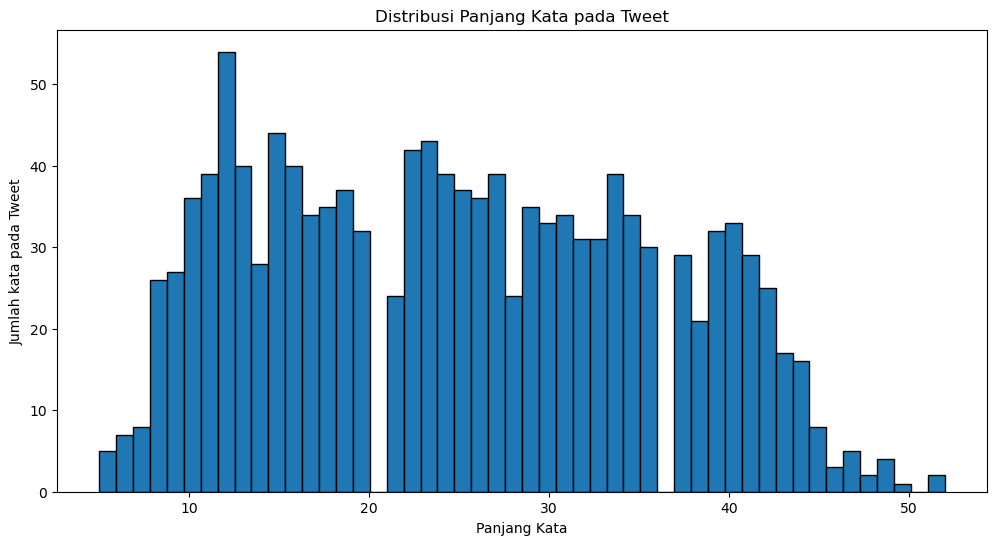

In [55]:
plt.figure(figsize=(12, 6))
plt.hist(train_set_sorted['word_count'], bins=50, edgecolor='black')
plt.title('Distribusi Panjang Kata pada Tweet')
plt.xlabel('Panjang Kata')
plt.ylabel('Jumlah kata pada Tweet')
plt.show()

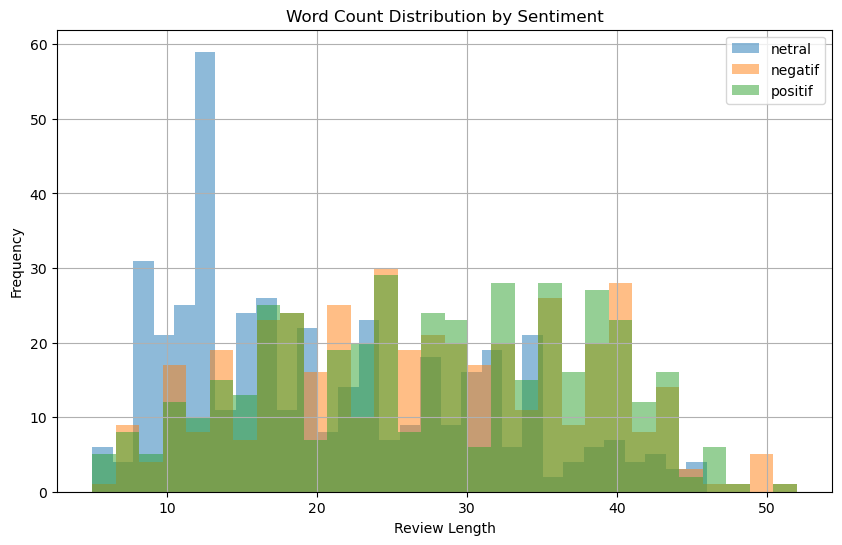

In [56]:
# Compare the review lengths across different sentiment categories
plt.figure(figsize=(10, 6))
for sentiment_category in train_set['sentimen'].unique():
    subset = train_set[train_set['sentimen'] == sentiment_category]
    plt.hist(subset['word_count'], bins=30, alpha=0.5, label=sentiment_category)

plt.title('Word Count Distribution by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Data Preprocessing

## Replace Emoticon

In [57]:
# Kamus untuk penggantian emotikon (by ChatGPT)
emoticon_dict = {
    "☺": "senyum",
    "✊": "kepalan tangan",
    "✌": "peace",
    "✌️": "peace",
    "❤️": "cinta",
    "⭐": "bintang",
    "🇮🇩": "bendera Indonesia",
    "🇲🇨": "bendera Indonesia",
    "🏆": "piala",
    "👆": "tunjuk ke atas",
    "👆🏻": "tunjuk ke atas",
    "👇": "tunjuk ke bawah",
    "👈🏻": "tunjuk ke kiri",
    "👉": "tunjuk ke kanan",
    "👊": "kepalan tangan",
    "👍": "jempol",
    "👍🏻": "jempol",
    "👍🏿": "jempol",
    "👏": "tepuk tangan",
    "👧": "anak perempuan",
    "💕": "cinta",
    "💪": "berotot",
    "😀": "senyum lebar",
    "😁": "senyum lebar",
    "😂": "tertawa",
    "😃": "senang",
    "😄": "senang",
    "😅": "tertawa",
    "😆": "tertawa",
    "😇": "malaikat",
    "😊": "senang",
    "😋": "menjilat bibir",
    "😍": "jatuh cinta",
    "😎": "keren",
    "😑": "datar",
    "😓": "keringat",
    "😘": "ciuman",
    "😚": "ciuman",
    "😜": "nakal",
    "😢": "menangis",
    "😪": "mengantuk",
    "😬": "senyum canggung",
    "😭": "menangis",
    "😶": "diam",
    "🙂": "senyum",
    "🙄": "melirik",
    "🙈": "tidak melihat",
    "🙎": "cemberut",
    "🙏": "berdoa",
    "🙏🏽": "berdoa",
    "🤒": "sakit",
    "🤔": "berpikir",
    "🤕": "sakit",
    "🤗": "pelukan",
    "🤣": "tertawa terbahak-bahak",
    "🤦": "menepuk dahi (wanita)",
    "🤦🏻": "menepuk dahi (pria)",
    "🤧": "bersin",
    "🤪": "gila",
    "🤭": "menutup mulut",
    "🤲": "tangan terbuka",
    "😃": "senang",
    "😊": "senang",
    "😂": "tertawa",
    "😢": "menangis",
    "😡": "marah",
    "😍": "cinta",
    "😎": "keren",
    "😞": "sedih",
    "😄": "tertawa",
    "😉": "menyeringai",
    "😭": "menangis keras",
    "😜": "menggoda",
    "😒": "tidak senang",
    "😔": "tertekan",
    "😇": "baik hati",
    "😋": "lezat",
    "😱": "ketakutan",
    "😠": "marah",
    "😴": "mengantuk",
    "😅": "keringat dingin",
    "😆": "tertawa terbahak",
    "😘": "cium",
    "😗": "cium",
    "😙": "cium",
    "😚": "cium",
    "😐": "datar",
    "😑": "tidak senang",
    "😶": "tidak bicara",
    "🙄": "putar mata",
    "😏": "sinis",
    "😣": "frustrasi",
    "😥": "lega",
    "😮": "terkejut",
    "😯": "terkejut",
    "😪": "mengantuk",
    "😫": "lelah",
    "😴": "tidur",
    "😌": "lega",
    "😛": "menjulurkan lidah",
    "😜": "menjulurkan lidah",
    "😝": "menjulurkan lidah",
    "😒": "tidak senang",
    "😓": "keringat dingin",
    "😔": "sedih",
    "😕": "bingung",
    "😲": "terkejut",
    "😷": "sakit",
    "😺": "kucing senang",
    "😸": "kucing senang",
    "😹": "kucing tertawa",
    "😻": "kucing cinta",
    "😼": "kucing sinis",
    "😽": "kucing cium",
    "🙀": "kucing terkejut",
    "😿": "kucing sedih",
    "😾": "kucing marah",
    "👍": "jempol",
    "👎": "jempol turun",
    "👌": "ok",
    "✌": "damai",
    "👋": "halo",
    "👏": "tepuk tangan",
    "👐": "tangan terbuka",
    "🙏": "berdoa",
    "👊": "tinju",
    "✊": "angkat tinju",
    "🤛": "tinju kiri",
    "🤜": "tinju kanan",
    "🤞": "menyilangkan jari",
    "✋": "tangan terbuka",
    "🤚": "tangan terbuka",
    "🖐": "tangan terbuka",
    "🖖": "salute vulcan"
}

In [58]:
import ftfy

# Fungsi untuk mengganti emotikon dengan nilai sesungguhnya
def replace_emoticons(text):
    for emoticon, value in emoticon_dict.items():
        text = text.replace(emoticon, " "+value)
        # text = text.replace(emoticon, "")
    return text

X_train['tweet'] = X_train['tweet'].apply(ftfy.fix_text)
X_test['tweet'] = X_test['tweet'].apply(ftfy.fix_text)
X_valid['tweet'] = X_valid['tweet'].apply(ftfy.fix_text)

# Mengganti emotikon dengan nilai sesungguhnya di kolom 'tweet' pada setiap DataFrame
X_train['tweet_non_emoticon'] = X_train['tweet'].apply(replace_emoticons)
X_test['tweet_non_emoticon'] = X_test['tweet'].apply(replace_emoticons)
X_valid['tweet_non_emoticon'] = X_valid['tweet'].apply(replace_emoticons)

In [59]:
X_train.sample(10)

,tweet,tweet_non_emoticon
1149,lah jokowi gaji plus tunjangan malah dibeliin sembako bwt kaum dhuafa,lah jokowi gaji plus tunjangan malah dibeliin sembako bwt kaum dhuafa
22,@prabowo apa bapak gak menghargai relawan yg puasa dan tirakatan munajad semalam suntuk berdoa untuk kemenangan 02 ? Mhn dibalas tweet dan kontribusi ngopi rokok dll mereka yg tirakat/mujahadah .Jika tdk maka 02 akan gagal.Ayo semua tirakat/ munajad.In,@prabowo apa bapak gak menghargai relawan yg puasa dan tirakatan munajad semalam suntuk berdoa untuk kemenangan 02 ? Mhn dibalas tweet dan kontribusi ngopi rokok dll mereka yg tirakat/mujahadah .Jika tdk maka 02 akan gagal.Ayo semua tirakat/ munajad.In
1072,Bahas ekonomi sekelas 02 dan wakilnya .Gak faham antara ekonomi mikro . Yg ditemui sandi memang sdh jelas pandangan politik nya .Jadi sdh jelas pandangan nya . Padahal kalo bicara uang 100 ribu dapet aja udah nipu . TDL untuk rakyat miskin 450 watt tdk pernah naik . Sandi bohong,Bahas ekonomi sekelas 02 dan wakilnya .Gak faham antara ekonomi mikro . Yg ditemui sandi memang sdh jelas pandangan politik nya .Jadi sdh jelas pandangan nya . Padahal kalo bicara uang 100 ribu dapet aja udah nipu . TDL untuk rakyat miskin 450 watt tdk pernah naik . Sandi bohong
1318,prabowo sandi meyakinkan pertumbuhan ekonomi pangan lebih maju dan berdaulat di kancah international serta bisa mengantar indonesia adil makmur,prabowo sandi meyakinkan pertumbuhan ekonomi pangan lebih maju dan berdaulat di kancah international serta bisa mengantar indonesia adil makmur
978,"Kl bicara jujur... @prabowo wajib katakan lbh detail..kl arah ekonomi/pembangunan NKRI sdh salah dr rezim Soeharto...""pelihara""pengusaha China dgn ""membunuh""pengusaha Pribumi(H ning,markam/karkam,Darpo,Rahman/tamin.dll)krn percaya""bisikan""csis..? https://twitter.com/ferrykoto/status/1117092682084442113 …","Kl bicara jujur... @prabowo wajib katakan lbh detail..kl arah ekonomi/pembangunan NKRI sdh salah dr rezim Soeharto...""pelihara""pengusaha China dgn ""membunuh""pengusaha Pribumi(H ning,markam/karkam,Darpo,Rahman/tamin.dll)krn percaya""bisikan""csis..? https://twitter.com/ferrykoto/status/1117092682084442113 …"
157,"Setelah melihat dirut PAM dan JAkpro diisi dgn org2 Pak Sandi, pemenang tender penyedia susu dr perusahaan Pak Prabowo, belum lagi yang lain2 yang belum terungkap. Apalah arti uang recehan gaji pokok jadi pejabat publik, mending buat pencitraan aja tidak usah diambil.","Setelah melihat dirut PAM dan JAkpro diisi dgn org2 Pak Sandi, pemenang tender penyedia susu dr perusahaan Pak Prabowo, belum lagi yang lain2 yang belum terungkap. Apalah arti uang recehan gaji pokok jadi pejabat publik, mending buat pencitraan aja tidak usah diambil."
600,"Disini pak jokowi ingin mendorong ekonomi kreatif yg mungkin akan berlangsung untuk jangka panjang nyatanya memperbaiki ekonomi tidak segampang itu, mungkin seperti itu sih penalaran saya dari hal tersebut.","Disini pak jokowi ingin mendorong ekonomi kreatif yg mungkin akan berlangsung untuk jangka panjang nyatanya memperbaiki ekonomi tidak segampang itu, mungkin seperti itu sih penalaran saya dari hal tersebut."
645,TKN Soal WO Demokrat: Prabowo Bagian Inti Orba yang Merusak - CNN Indonesia: TKN menanggapi pernyataan Prabowo yang menyalahkan para presiden sebelum Jokowi soal perekonomian Indonesia. Pernyataan itu berujung walk out petinggi Demokrat. http://dlvr.it/R2nLj7 pic.twitter.com/MrmnQeymEO,TKN Soal WO Demokrat: Prabowo Bagian Inti Orba yang Merusak - CNN Indonesia: TKN menanggapi pernyataan Prabowo yang menyalahkan para presiden sebelum Jokowi soal perekonomian Indonesia. Pernyataan itu berujung walk out petinggi Demokrat. http://dlvr.it/R2nLj7 pic.twitter.com/MrmnQeymEO
1146,"AHY meyakini Demokrat tetap berada di koalisi pendukung oposisi meski salah satu pernyataan Prabowo dalam debat kelima Pilpres, dianggap seolah menyalahkan SBY terkait kondisi ekonomi Indonesia saat ini. https://www.viva.co.id/pemilu/berita-pemilu/1139529-ahy-tidak-mungkin-demo

In [60]:
X_test

,tweet,tweet_non_emoticon
1300,"permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi","permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi"
1590,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur
1729,Bangga dengan mental gembelnya. Tidak ada kebanggaan harga diri. Ngeri jika budaya ini disebarkan,Bangga dengan mental gembelnya. Tidak ada kebanggaan harga diri. Ngeri jika budaya ini disebarkan
921,"Apa saja kabar menarik dalam sepekan ini? Ya kita mulai saja: ada soal Jokowi yang kena hoaks lebih banyak, permainan di balik harga tiket pesawat, dan 4 kabar lainnya. #RingkasanSepekan https://beritagar.id/artikel/berita/6-kabar-terpopuler-sepekan-terakhir …","Apa saja kabar menarik dalam sepekan ini? Ya kita mulai saja: ada soal Jokowi yang kena hoaks lebih banyak, permainan di balik harga tiket pesawat, dan 4 kabar lainnya. #RingkasanSepekan https://beritagar.id/artikel/berita/6-kabar-terpopuler-sepekan-terakhir …"
463,"Saham sdh dijual,aset banyak berkurang & sekarang tidak akan menerima gaji...????hmmmmm.... Mau korupsi yg g seberapa...???","Saham sdh dijual,aset banyak berkurang & sekarang tidak akan menerima gaji...????hmmmmm.... Mau korupsi yg g seberapa...???"
...,...,...
1705,"Prabowo-Sandi tak akan ambil gaji jika terpilih mjd presiden dan wakil presiden. Mereka akan alokasikan gaji untuk kaum dhuafa, yatim piatu, dan untuk kepentingan Indonesia. <<=== denger statement ini tadi jadi pen ketawa 😄","Prabowo-Sandi tak akan ambil gaji jika terpilih mjd presiden dan wakil presiden. Mereka akan alokasikan gaji untuk kaum dhuafa, yatim piatu, dan untuk kepentingan Indonesia. <<=== denger statement ini tadi jadi pen ketawa tertawa"
49,"#PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Beberapa penghargaan yg dianugerahkan kepadanya, menjadi bukti bahwa @jokowi adalah sosok pemimpin yg diakui integritasnya. https://nasional.kompas.com/read/2018/09/24/22563621/disaksikan-sandiaga-jokowi-dapat-penghargaan-tokoh-pemerataan-pembangunan …","#PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Beberapa penghargaan yg dianugerahkan kepadanya, menjadi bukti bahwa @jokowi adalah sosok pemimpin yg diakui integritasnya. https://nasional.kompas.com/read/2018/09/24/22563621/disaksikan-sandiaga-jokowi-dapat-penghargaan-tokoh-pemerataan-pembangunan …"
1025,#JokowiMenangTotalDebat Jokowi juga ingin memasukan Digital ekonomi melalui anak anak muda kita yang sudah mengembangkan teknologi dan digabungkan dengan hasil petani pertanian maupun perikanan untuk lebih luas menjual kepada konsumen.,#JokowiMenangTotalDebat Jokowi juga ingin memasukan Digital ekonomi melalui anak anak muda kita yang sudah mengembangkan teknologi dan digabungkan dengan hasil petani pertanian maupun perikanan untuk lebih luas menjual kepada konsumen.
817,"Antek asing, PKI, ekonomi amburadul. harga2 naik, raja hutang, plonga-plongo, sekolam,....bla...bla..bla😠👆 ""BERISIK LU! Prabowo bilang BUKAN SALAH JOKOWI. Klean lebih Prabowo daripada Prabowo?😑"" ""😳👆"" #bukansalahbapak pic.twitter.com/U3if7lOyMH","Antek asing, PKI, ekonomi amburadul. harga2 naik, raja hutang, plonga-plongo, sekolam,....bla...bla..bla marah tunjuk ke atas ""BERISIK LU! Prabowo bilang BUKAN SALAH JOKOWI. Klean lebih Prabowo daripada Prabowo? tidak senang"" ""😳 tunjuk ke atas"" 

In [61]:
X_valid

,tweet,tweet_non_emoticon
109,"@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi https://bit.ly/2Ogymxt","@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi https://bit.ly/2Ogymxt"
1225,"Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina","Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina"
617,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet. Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa #PrabowoSandiMenangDebat,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet. Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa #PrabowoSandiMenangDebat
692,ga boleh suuzon mba hehe hargai dong hasil kerja pak Jokowi yg sdh membangun negri ini. kalau benci emang jadi susah ya hargai kerja keras orang lain 😁,ga boleh suuzon mba hehe hargai dong hasil kerja pak Jokowi yg sdh membangun negri ini. kalau benci emang jadi susah ya hargai kerja keras orang lain senyum lebar
1433,Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata http://dlvr.it/R2mZW1 pic.twitter.com/LOrP3WIhsb,Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata http://dlvr.it/R2mZW1 pic.twitter.com/LOrP3WIhsb
...,...,...
784,Lo kok pilih jokowi sih?? Mau lo dibego2in lagi? Ga liat apa harga pd naik?? Iya.. harga pd naik.. tp gaji gw juga naik. Gaji lo ga naik? Mungkin karna kerja lo cuma ngabisin kopi di pantry kantor. Ga heran,Lo kok pilih jokowi sih?? Mau lo dibego2in lagi? Ga liat apa harga pd naik?? Iya.. harga pd naik.. tp gaji gw juga naik. Gaji lo ga naik? Mungkin karna kerja lo cuma ngabisin kopi di pantry kantor. Ga heran
1430,"Tutup Debat, Prabowo Sindir Jokowi Soal Dana Desa, Sandiaga Janji Tak Ambil Gaji https://www.merdeka.com/politik/tutup-debat-prabowo-sindir-jokowi-soal-dana-desa-sandiaga-janji-tak-ambil-gaji.html … pic.twitter.com/4R0ldqqfBm","Tutup Debat, Prabowo Sindir Jokowi Soal Dana Desa, Sandiaga Janji Tak Ambil Gaji https://www.merdeka.com/politik/tutup-debat-prabowo-sindir-jokowi-soal-dana-desa-sandiaga-janji-tak-ambil-gaji.html … pic.twitter.com/4R0ldqqfBm"
202,Gaji karyawan yang terkatung-katung apa kabar?,Gaji karyawan yang terkatung-katung apa kabar?
625,"Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada di Kubu Prabowo Dulu dukung Jokowi krn miliki harapan pertumbuhan ekonomi tp tdk terlaksana. https://pilpres.tempo.co/read/1195105/tak-dukung-jokowi-lagi-dahlan-iskan-kini-ada-di-kubu-prabowo … #minggu #bogor #banten #belitung #jakarta #TANGERANG #bandung #bekasi #cirebon #JabarJuara #jateng #semarang #jatim","Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada di Kubu Prabowo Dulu dukung Jokowi krn miliki harapan pertumbuhan ekonomi tp tdk terlaksana. https://pilpres.tempo.co/read/1195105/tak-dukung-jokowi-lagi-dahlan-iskan-kini-ada-di-kubu-prabowo … #minggu #bogor #banten #belitung #jakarta #TANGERANG #bandung #bekasi #cirebon #JabarJuara #jateng #semarang #jatim"


## Remove https, pictwitter, bitly

In [62]:
# Menghapus https dan tweet yang berasal dari Twitter
X_train['tweet_non_url'] = X_train['tweet_non_emoticon'].str.replace(r'http?://\S+|https?://\S+|pic.twitter.com/\S+', '', regex=True)
X_valid['tweet_non_url'] = X_valid['tweet_non_emoticon'].str.replace(r'http?://\S+|https?://\S+|pic.twitter.com/\S+', '', regex=True)
X_test['tweet_non_url'] = X_test['tweet_non_emoticon'].str.replace(r'http?://\S+|https?://\S+|pic.twitter.com/\S+', '', regex=True)

In [63]:
X_train.sample(10)

,tweet,tweet_non_emoticon,tweet_non_url
1035,Gak penting soal kita akan lapar. Yg penting bagaimana pemerintah menjamin harga bahan baku dippasaran .,Gak penting soal kita akan lapar. Yg penting bagaimana pemerintah menjamin harga bahan baku dippasaran .,Gak penting soal kita akan lapar. Yg penting bagaimana pemerintah menjamin harga bahan baku dippasaran .
1549,"Pak Prabowo-Sandi udah tajir melintir, gaji pres dan wapres receh buat beliau.. Beda ama jae dan gerombolan nya, gaji di ambil impor di tambah (fee impor di gasak juga tentunya).... Niat mengabdi tulus utk bangsa ini yg buat Prabowo-Sandi tak terbendung....✌️🙏","Pak Prabowo-Sandi udah tajir melintir, gaji pres dan wapres receh buat beliau.. Beda ama jae dan gerombolan nya, gaji di ambil impor di tambah (fee impor di gasak juga tentunya).... Niat mengabdi tulus utk bangsa ini yg buat Prabowo-Sandi tak terbendung.... damai️ berdoa","Pak Prabowo-Sandi udah tajir melintir, gaji pres dan wapres receh buat beliau.. Beda ama jae dan gerombolan nya, gaji di ambil impor di tambah (fee impor di gasak juga tentunya).... Niat mengabdi tulus utk bangsa ini yg buat Prabowo-Sandi tak terbendung.... damai️ berdoa"
526,Edunnn.... Sekelas Menterinya pak @jokowi Sekelas Pejabatnya @cakimiNOW @DPP_PKB Bisa2nya nyebar hoax. @kemkominfo @rudiantara_id digaji rakyat ngapain aja klo temen sendiri nyebar HOAX dibiarkan????,Edunnn.... Sekelas Menterinya pak @jokowi Sekelas Pejabatnya @cakimiNOW @DPP_PKB Bisa2nya nyebar hoax. @kemkominfo @rudiantara_id digaji rakyat ngapain aja klo temen sendiri nyebar HOAX dibiarkan????,Edunnn.... Sekelas Menterinya pak @jokowi Sekelas Pejabatnya @cakimiNOW @DPP_PKB Bisa2nya nyebar hoax. @kemkominfo @rudiantara_id digaji rakyat ngapain aja klo temen sendiri nyebar HOAX dibiarkan????
231,Utang prabowo bwjibun ..bukan utng ln lho utang pribadinya puluhan triltun jd gaji ngk diambil....busyeettt jngn2 utang bebas ngk dibayar jemarin2 sdh minta dipailitkan biar ngk bayar tp pemerintah ngk mau mk bwrambiai mengumbar janji https://twitter.com/detikcom/status/1117096276737306625 …,Utang prabowo bwjibun ..bukan utng ln lho utang pribadinya puluhan triltun jd gaji ngk diambil....busyeettt jngn2 utang bebas ngk dibayar jemarin2 sdh minta dipailitkan biar ngk bayar tp pemerintah ngk mau mk bwrambiai mengumbar janji https://twitter.com/detikcom/status/1117096276737306625 …,Utang prabowo bwjibun ..bukan utng ln lho utang pribadinya puluhan triltun jd gaji ngk diambil....busyeettt jngn2 utang bebas ngk dibayar jemarin2 sdh minta dipailitkan biar ngk bayar tp pemerintah ngk mau mk bwrambiai mengumbar janji …
355,Jokowi: RI Akan Masuk 4 Besar Kekuatan Ekonomi pada 2045 https://bisnis.tempo.co/read/1195412/jokowi-ri-akan-masuk-4-besar-kekuatan-ekonomi-pada-2045?utm_source=Digital%20Marketing&utm_medium=Facebook&utm_campaign=dlvrit …,Jokowi: RI Akan Masuk 4 Besar Kekuatan Ekonomi pada 2045 https://bisnis.tempo.co/read/1195412/jokowi-ri-akan-masuk-4-besar-kekuatan-ekonomi-pada-2045?utm_source=Digital%20Marketing&utm_medium=Facebook&utm_campaign=dlvrit …,Jokowi: RI Akan Masuk 4 Besar Kekuatan Ekonomi pada 2045 …
1753,Prabowo Sandi menyerahkan gajinya untuk anak yatim & kaum duafa.aamiin #GueKapokPilihJokowi,Prabowo Sandi menyerahkan gajinya untuk anak yatim & kaum duafa.aamiin #GueKapokPilihJokowi,Prabowo Sandi menyerahkan gajinya untuk anak yatim & kaum duafa.aamiin #GueKapokPilihJokowi
500,"Namun, sebagai anak seorang ahli ekonomi, fenomena ransel besar Prabowo juga sesuatu yang wajar bagi Yunus. prabowo sandiuno #PrabowoSandi #IndonesiaMenang #IndonesiaAdilMakmur","Namun, sebagai anak seorang ahli ekonomi, fenomena ransel besar Prabowo juga sesuatu yang wajar bagi Yunus. prabowo sandiuno #PrabowoSandi #IndonesiaMenang #IndonesiaAdilMakmur","Namun, sebagai anak seorang ahli ekonomi, fenomena ransel besar Prabowo juga sesuatu yang wajar bagi Yunus. prabowo sandiuno #PrabowoSandi #IndonesiaMenang #IndonesiaAdilMakmur"
686,"Membangun dan merevitalisasi pasar rakyat, menjaga stabil

In [64]:
X_valid

,tweet,tweet_non_emoticon,tweet_non_url
109,"@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi https://bit.ly/2Ogymxt","@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi https://bit.ly/2Ogymxt","@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi"
1225,"Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina","Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina","Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina"
617,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet. Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa #PrabowoSandiMenangDebat,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet. Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa #PrabowoSandiMenangDebat,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet. Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa #PrabowoSandiMenangDebat
692,ga boleh suuzon mba hehe hargai dong hasil kerja pak Jokowi yg sdh membangun negri ini. kalau benci emang jadi susah ya hargai kerja keras orang lain 😁,ga boleh suuzon mba hehe hargai dong hasil kerja pak Jokowi yg sdh membangun negri ini. kalau benci emang jadi susah ya hargai kerja keras orang lain senyum lebar,ga boleh suuzon mba hehe hargai dong hasil kerja pak Jokowi yg sdh membangun negri ini. kalau benci emang jadi susah ya hargai kerja keras orang lain senyum lebar
1433,Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata http://dlvr.it/R2mZW1 pic.twitter.com/LOrP3WIhsb,Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata http://dlvr.it/R2mZW1 pic.twitter.com/LOrP3WIhsb,Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata
...,...,...,...
784,Lo kok pilih jokowi sih?? Mau lo dibego2in lagi? Ga liat apa harga pd naik?? Iya.. harga pd naik.. tp gaji gw juga naik. Gaji lo ga naik? Mungkin karna kerja lo cuma ngabisin kopi di pantry kantor. Ga heran,Lo kok pilih jokowi sih?? Mau lo dibego2in lagi? Ga liat apa harga pd naik?? Iya.. harga pd naik.. tp gaji gw juga naik. Gaji lo ga naik? Mungkin karna kerja lo cuma ngabisin kopi di pantry kantor. Ga heran,Lo kok pilih jokowi sih?? Mau lo dibego2in lagi? Ga liat apa harga pd naik?? Iya.. harga pd naik.. tp gaji gw juga naik. Gaji lo ga naik? Mungkin karna kerja lo cuma ngabisin kopi di pantry kantor. Ga heran
1430,"Tutup Debat, Prabowo Sindir Jokowi Soal Dana Desa, Sandiaga Janji Tak Ambil Gaji https://www.merdeka.com/politik/tutup-debat-prabowo-sindir-jokowi-soal-dana-desa-sandiaga-janji-tak-ambil-gaji.html … pic.twitter.com/4R0ldqqfBm","Tutup Debat, Prabowo Sindir Jokowi Soal Dana Desa, Sandiaga Janji Tak Ambil Gaji https://www.merdeka.com/politik/tutup-debat-prabowo-sindir-jokowi-soal-dana-desa-sandiaga-janji-tak-ambil-gaji.html … pic.twitter.com/4R0ldqqfBm","Tutup Debat, Prabowo Sindir Jokowi Soal Dana Desa,

In [65]:
X_test

,tweet,tweet_non_emoticon,tweet_non_url
1300,"permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi","permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi","permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi"
1590,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur
1729,Bangga dengan mental gembelnya. Tidak ada kebanggaan harga diri. Ngeri jika budaya ini disebarkan,Bangga dengan mental gembelnya. Tidak ada kebanggaan harga diri. Ngeri jika budaya ini disebarkan,Bangga dengan mental gembelnya. Tidak ada kebanggaan harga diri. Ngeri jika budaya ini disebarkan
921,"Apa saja kabar menarik dalam sepekan ini? Ya kita mulai saja: ada soal Jokowi yang kena hoaks lebih banyak, permainan di balik harga tiket pesawat, dan 4 kabar lainnya. #RingkasanSepekan https://beritagar.id/artikel/berita/6-kabar-terpopuler-sepekan-terakhir …","Apa saja kabar menarik dalam sepekan ini? Ya kita mulai saja: ada soal Jokowi yang kena hoaks lebih banyak, permainan di balik harga tiket pesawat, dan 4 kabar lainnya. #RingkasanSepekan https://beritagar.id/artikel/berita/6-kabar-terpopuler-sepekan-terakhir …","Apa saja kabar menarik dalam sepekan ini? Ya kita mulai saja: ada soal Jokowi yang kena hoaks lebih banyak, permainan di balik harga tiket pesawat, dan 4 kabar lainnya. #RingkasanSepekan …"
463,"Saham sdh dijual,aset banyak berkurang & sekarang tidak akan menerima gaji...????hmmmmm.... Mau korupsi yg g seberapa...???","Saham sdh dijual,aset banyak berkurang & sekarang tidak akan menerima gaji...????hmmmmm.... Mau korupsi yg g seberapa...???","Saham sdh dijual,aset banyak berkurang & sekarang tidak akan menerima gaji...????hmmmmm.... Mau korupsi yg g seberapa...???"
...,...,...,...
1705,"Prabowo-Sandi tak akan ambil gaji jika terpilih mjd presiden dan wakil presiden. Mereka akan alokasikan gaji untuk kaum dhuafa, yatim piatu, dan untuk kepentingan Indonesia. <<=== denger statement ini tadi jadi pen ketawa 😄","Prabowo-Sandi tak akan ambil gaji jika terpilih mjd presiden dan wakil presiden. Mereka akan alokasikan gaji untuk kaum dhuafa, yatim piatu, dan untuk kepentingan Indonesia. <<=== denger statement ini tadi jadi pen ketawa tertawa","Prabowo-Sandi tak akan ambil gaji jika terpilih mjd presiden dan wakil presiden. Mereka akan alokasikan gaji untuk kaum dhuafa, yatim piatu, dan untuk kepentingan Indonesia. <<=== denger statement ini tadi jadi pen ketawa tertawa"
49,"#PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Beberapa penghargaan yg dianugerahkan kepadanya, menjadi bukti bahwa @jokowi adalah sosok pemimpin yg diakui integritasnya. https://nasional.kompas.com/read/2018/09/24/22563621/disaksikan-sandiaga-jokowi-dapat-penghargaan-tokoh-pemerataan-pembangunan …","#PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Beberapa penghargaan yg dianugerahkan kepadanya, menjadi bukti bahwa @jokowi adalah sosok pemimpin yg diakui integrita

## Remove @ pada username, # pada hastag, Punctuation, dan Special Characters

In [66]:
def remove_special_character(text):
    # remove mention
    text = re.sub(r'@\w+', '', text)

    # remove hashtag symbol
    text = re.sub(r'#', '', text)

    # Mengganti karakter khusus dan punctuation dengan string kosong
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

In [67]:
# Menghapus karakter khusus dari kolom 'tweet' pada setiap DataFrame
X_train['tweet_non_special_characters'] = X_train['tweet_non_url'].apply(remove_special_character)
X_test['tweet_non_special_characters'] = X_test['tweet_non_url'].apply(remove_special_character)
X_valid['tweet_non_special_characters'] = X_valid['tweet_non_url'].apply(remove_special_character)

In [68]:
X_train.sample(10)

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters
1074,"Rossi, percuma kamu cepat kalau negara kamu masih miskin, harga pangan mahal, listrik mahal, nyari kerja susah, dan keamanan kita hancur, ujar Presiden Italia Prabowo Musolini https://twitter.com/MotoGP/status/1117152503752269830 …","Rossi, percuma kamu cepat kalau negara kamu masih miskin, harga pangan mahal, listrik mahal, nyari kerja susah, dan keamanan kita hancur, ujar Presiden Italia Prabowo Musolini https://twitter.com/MotoGP/status/1117152503752269830 …","Rossi, percuma kamu cepat kalau negara kamu masih miskin, harga pangan mahal, listrik mahal, nyari kerja susah, dan keamanan kita hancur, ujar Presiden Italia Prabowo Musolini …",Rossi percuma kamu cepat kalau negara kamu masih miskin harga pangan mahal listrik mahal nyari kerja susah dan keamanan kita hancur ujar Presiden Italia Prabowo Musolini
1093,Itu bedanya pemimpin dan bukan pemimpin. Pemimpin memecahkan masalah secara makro untuk seluruh rakyat. Pemimpin KW memecahkan masalah berdasarkan keluhan perorangan. Hasilnya seperti TGUPP DKI yang digaji untuk menyenangkan mereka bukan memecahkan masalah DKI: banjir dan macet.,Itu bedanya pemimpin dan bukan pemimpin. Pemimpin memecahkan masalah secara makro untuk seluruh rakyat. Pemimpin KW memecahkan masalah berdasarkan keluhan perorangan. Hasilnya seperti TGUPP DKI yang digaji untuk menyenangkan mereka bukan memecahkan masalah DKI: banjir dan macet.,Itu bedanya pemimpin dan bukan pemimpin. Pemimpin memecahkan masalah secara makro untuk seluruh rakyat. Pemimpin KW memecahkan masalah berdasarkan keluhan perorangan. Hasilnya seperti TGUPP DKI yang digaji untuk menyenangkan mereka bukan memecahkan masalah DKI: banjir dan macet.,Itu bedanya pemimpin dan bukan pemimpin Pemimpin memecahkan masalah secara makro untuk seluruh rakyat Pemimpin KW memecahkan masalah berdasarkan keluhan perorangan Hasilnya seperti TGUPP DKI yang digaji untuk menyenangkan mereka bukan memecahkan masalah DKI banjir dan macet
859,"Sebut Ibu Mia saat Debat Ekonomi Makro, Sandiaga Disemprot Jokowi https://amp.suara.com/news/2019/04/13/221059/sebut-ibu-mia-saat-debat-ekonomi-makro-sandiaga-disemprot-jokowi?utm_source=facebook&utm_medium=fp …","Sebut Ibu Mia saat Debat Ekonomi Makro, Sandiaga Disemprot Jokowi https://amp.suara.com/news/2019/04/13/221059/sebut-ibu-mia-saat-debat-ekonomi-makro-sandiaga-disemprot-jokowi?utm_source=facebook&utm_medium=fp …","Sebut Ibu Mia saat Debat Ekonomi Makro, Sandiaga Disemprot Jokowi …",Sebut Ibu Mia saat Debat Ekonomi Makro Sandiaga Disemprot Jokowi
894,Demokrat Minta Prabowo Hargai Kontribusi Presiden SBY http://bit.ly/2X9aSxx,Demokrat Minta Prabowo Hargai Kontribusi Presiden SBY http://bit.ly/2X9aSxx,Demokrat Minta Prabowo Hargai Kontribusi Presiden SBY,Demokrat Minta Prabowo Hargai Kontribusi Presiden SBY
1378,"Prabowo-sandi jika terpilih gajinya tidak akan di ambil, tapi akan di sumbangkan ke kaum duafa","Prabowo-sandi jika terpilih gajinya tidak akan di ambil, tapi akan di sumbangkan ke kaum duafa","Prabowo-sandi jika terpilih gajinya tidak akan di ambil, tapi akan di sumbangkan ke kaum duafa",Prabowosandi jika terpilih gajinya tidak akan di ambil tapi akan di sumbangkan ke kaum duafa
1147,Iye gaji gak diambil... proyek dikuasain kroni..trus kroninya njamin kebutuhan hidup situ dan keluarga.. cuman maen kata2 doang... pemilu depan rakyat planga plongo dijadiin senjata lagi,Iye gaji gak diambil... proyek dikuasain kroni..trus kroninya njamin kebutuhan hidup situ dan keluarga.. cuman maen kata2 doang... pemilu depan rakyat planga plongo dijadiin senjata lagi,Iye gaji gak diambil... proyek dikuasain kroni..trus kroninya njamin kebutuhan hidup situ dan keluarga.. cuman maen kata2 doang... pemilu depan rakyat planga plongo dijadiin senjata lagi,Iye gaji gak diambil proyek dikuasain kronitrus kroninya njamin kebutuhan hidup situ dan keluarga cuman maen kata2 doang pemilu depan rakyat planga plongo dijadiin senjata lagi
1164,"Pak Dhe @Jokowi men

In [69]:
X_test

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters
1300,"permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi","permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi","permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi",permasalahan di bawah tentu tak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya krn faktor individu tsb penyebab kemiskinan tdk hanya faktor ekonomi
1590,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan Bersama Prabowo Sandi indoneaia Adil dan Makmur
1729,Bangga dengan mental gembelnya. Tidak ada kebanggaan harga diri. Ngeri jika budaya ini disebarkan,Bangga dengan mental gembelnya. Tidak ada kebanggaan harga diri. Ngeri jika budaya ini disebarkan,Bangga dengan mental gembelnya. Tidak ada kebanggaan harga diri. Ngeri jika budaya ini disebarkan,Bangga dengan mental gembelnya Tidak ada kebanggaan harga diri Ngeri jika budaya ini disebarkan
921,"Apa saja kabar menarik dalam sepekan ini? Ya kita mulai saja: ada soal Jokowi yang kena hoaks lebih banyak, permainan di balik harga tiket pesawat, dan 4 kabar lainnya. #RingkasanSepekan https://beritagar.id/artikel/berita/6-kabar-terpopuler-sepekan-terakhir …","Apa saja kabar menarik dalam sepekan ini? Ya kita mulai saja: ada soal Jokowi yang kena hoaks lebih banyak, permainan di balik harga tiket pesawat, dan 4 kabar lainnya. #RingkasanSepekan https://beritagar.id/artikel/berita/6-kabar-terpopuler-sepekan-terakhir …","Apa saja kabar menarik dalam sepekan ini? Ya kita mulai saja: ada soal Jokowi yang kena hoaks lebih banyak, permainan di balik harga tiket pesawat, dan 4 kabar lainnya. #RingkasanSepekan …",Apa saja kabar menarik dalam sepekan ini Ya kita mulai saja ada soal Jokowi yang kena hoaks lebih banyak permainan di balik harga tiket pesawat dan 4 kabar lainnya RingkasanSepekan
463,"Saham sdh dijual,aset banyak berkurang & sekarang tidak akan menerima gaji...????hmmmmm.... Mau korupsi yg g seberapa...???","Saham sdh dijual,aset banyak berkurang & sekarang tidak akan menerima gaji...????hmmmmm.... Mau korupsi yg g seberapa...???","Saham sdh dijual,aset banyak berkurang & sekarang tidak akan menerima gaji...????hmmmmm.... Mau korupsi yg g seberapa...???",Saham sdh dijualaset banyak berkurang sekarang tidak akan menerima gajihmmmmm Mau korupsi yg g seberapa
...,...,...,...,...
1705,"Prabowo-Sandi tak akan ambil gaji jika terpilih mjd presiden dan wakil presiden. Mereka akan alokasikan gaji untuk kaum dhuafa, yatim piatu, dan untuk kepentingan Indonesia. <<=== denger statement ini tadi jadi pen ketawa 😄","Prabowo-Sandi tak akan ambil gaji jika terpilih mjd presiden dan wakil presiden. Mereka 

In [70]:
X_valid

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters
109,"@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi https://bit.ly/2Ogymxt","@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi https://bit.ly/2Ogymxt","@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi",17 April Coblos JokowiMaruf PilihOrangBaik PilihJelasIslamnya PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya Nah ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi
1225,"Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina","Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina","Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina",Rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar rezim ga peduli pertamina
617,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet. Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa #PrabowoSandiMenangDebat,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet. Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa #PrabowoSandiMenangDebat,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet. Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa #PrabowoSandiMenangDebat,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa PrabowoSandiMenangDebat
692,ga boleh suuzon mba hehe hargai dong hasil kerja pak Jokowi yg sdh membangun negri ini. kalau benci emang jadi susah ya hargai kerja keras orang lain 😁,ga boleh suuzon mba hehe hargai dong hasil kerja pak Jokowi yg sdh membangun negri ini. kalau benci emang jadi susah ya hargai kerja keras orang lain senyum lebar,ga boleh suuzon mba hehe hargai dong hasil kerja pak Jokowi yg sdh membangun negri ini. kalau benci emang jadi susah ya hargai kerja keras orang lain senyum lebar,ga boleh suuzon mba hehe hargai dong hasil kerja pak Jokowi yg sdh membangun negri ini kalau benci emang jadi susah ya hargai kerja keras orang lain senyum lebar
1433,Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata http://dlvr.it/R2mZW1 pic.twitter.com/LOrP3WIhsb,Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata http://dlvr.it/R2mZW1 pic.twitter.com/LOrP3WIhsb,Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata,Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata
...,...,...,...,...
784,Lo kok pilih jokowi sih?? Mau lo dibego2in lagi? Ga liat apa harga pd naik?? Iya.. harga pd naik.. tp gaji gw juga naik. Gaji lo ga naik? Mungkin karna kerja lo cuma ngabisin kopi di pantry kantor. Ga heran,Lo kok pilih jokowi sih?? Mau lo dibego2in lagi? Ga liat a

## Convert to Lower Case

In [71]:
# Mengubah isi kolom tweet_non_double_space menjadi lowercase di X_train
X_train['tweet_lowercase'] = X_train['tweet_non_special_characters'].str.lower()

# Mengubah isi kolom tweet_non_double_space menjadi lowercase di X_test
X_test['tweet_lowercase'] = X_test['tweet_non_special_characters'].str.lower()

# Mengubah isi kolom tweet_non_double_space menjadi lowercase di X_valid
X_valid['tweet_lowercase'] = X_valid['tweet_non_special_characters'].str.lower()

## Replace bahasa Slang

In [72]:
import nltk
from nltk.tokenize import word_tokenize

def convert_double_words(text):
    # Find words ending with "2"
    double_words = re.findall(r'\b[a-zA-Z]+2\b', text)

    # Replace double words with their expanded form
    for word in double_words:
        base_word = word[:-1]
        text = text.replace(word, base_word + '' + base_word)
    return text

# Fungsi untuk membaca kamus slang
def read_slang_dict(filename):
    slang_dict = {}
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            slang, baku = line.strip().split('\t')
            slang_dict[slang] = baku
    return slang_dict

# Membaca kamus slang dari file
slang_dict = read_slang_dict('bahasa_gaul_indonesia.txt')

# Fungsi untuk mengganti slang dengan kata baku
def replace_slang(tweet):
    # Tokenize tweet menjadi kata-kata
    words = word_tokenize(tweet)
    # Mengganti kata slang dengan kata baku jika ada dalam kamus
    translated_words = [slang_dict[word.lower()] if word.lower() in slang_dict else word for word in words]
    # Menggabungkan kembali kata-kata menjadi teks
    translated_tweet = ' '.join(translated_words)

    # ubah kata ganda (cth: siap2 menjadi siap siap)
    translated_tweet = convert_double_words(translated_tweet)
    return translated_tweet

In [73]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
# Terapkan replace_slang pada kolom tweet_lowercase di setiap dataframe
X_train['tweet_non_slang'] = X_train['tweet_lowercase'].apply(replace_slang)
X_valid['tweet_non_slang'] = X_valid['tweet_lowercase'].apply(replace_slang)
X_test['tweet_non_slang'] = X_test['tweet_lowercase'].apply(replace_slang)

In [75]:
X_train.sample(10)

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang
638,"Pak Jokowi yg terhormat,17 April kan libur nasional, kepres nya kan begitu,tp d tempat kerja saya masih masuk kerja,kalau gak masuk kerja pada 17 April akan di potong gaji kita,tolonglah tindak tegas bagi pengusaha pengusaha yg tdk taat kepres,dan tolong lindungi hak kita pak.","Pak Jokowi yg terhormat,17 April kan libur nasional, kepres nya kan begitu,tp d tempat kerja saya masih masuk kerja,kalau gak masuk kerja pada 17 April akan di potong gaji kita,tolonglah tindak tegas bagi pengusaha pengusaha yg tdk taat kepres,dan tolong lindungi hak kita pak.","Pak Jokowi yg terhormat,17 April kan libur nasional, kepres nya kan begitu,tp d tempat kerja saya masih masuk kerja,kalau gak masuk kerja pada 17 April akan di potong gaji kita,tolonglah tindak tegas bagi pengusaha pengusaha yg tdk taat kepres,dan tolong lindungi hak kita pak.",Pak Jokowi yg terhormat17 April kan libur nasional kepres nya kan begitutp d tempat kerja saya masih masuk kerjakalau gak masuk kerja pada 17 April akan di potong gaji kitatolonglah tindak tegas bagi pengusaha pengusaha yg tdk taat kepresdan tolong lindungi hak kita pak,pak jokowi yg terhormat17 april kan libur nasional kepres nya kan begitutp d tempat kerja saya masih masuk kerjakalau gak masuk kerja pada 17 april akan di potong gaji kitatolonglah tindak tegas bagi pengusaha pengusaha yg tdk taat kepresdan tolong lindungi hak kita pak,pak jokowi yang terhormat17 april kan libur nasional kepres nya kan begitutp di tempat kerja saya masuk masuk kerjakalau tidak masuk kerja pada 17 april akan di potong gaji kitatolonglah tindak tegas bagi pengusaha pengusaha yang tidak taat kepresdan tolong lindungi hak kita pak
1782,"Kita hargai.. Kita hormati.. Walaupun kami sedih melihatnya.. Ma'ruf Amin Tolak Hadiri Kampanye Prabowo yang Undang PA 212: Sudah Selesai, Enggak Ada Hubungan http://share.babe.news/s/xwcSfkd","Kita hargai.. Kita hormati.. Walaupun kami sedih melihatnya.. Ma'ruf Amin Tolak Hadiri Kampanye Prabowo yang Undang PA 212: Sudah Selesai, Enggak Ada Hubungan http://share.babe.news/s/xwcSfkd","Kita hargai.. Kita hormati.. Walaupun kami sedih melihatnya.. Ma'ruf Amin Tolak Hadiri Kampanye Prabowo yang Undang PA 212: Sudah Selesai, Enggak Ada Hubungan",Kita hargai Kita hormati Walaupun kami sedih melihatnya Maruf Amin Tolak Hadiri Kampanye Prabowo yang Undang PA 212 Sudah Selesai Enggak Ada Hubungan,kita hargai kita hormati walaupun kami sedih melihatnya maruf amin tolak hadiri kampanye prabowo yang undang pa 212 sudah selesai enggak ada hubungan,kita hargai kita hormati walaupun kami sedih melihatnya maruf amin tolak hadiri kampanye prabowo yang undang apa 212 sudah selesai tidak ada hubungan
1314,Nih pak presiden dan panglima tertinggi yang sebenarnya yg bisa menghargai pendahulunya @SBYudhoyono @prabowo https://twitter.com/AndiArief__/status/1117262020338831360 …,Nih pak presiden dan panglima tertinggi yang sebenarnya yg bisa menghargai pendahulunya @SBYudhoyono @prabowo https://twitter.com/AndiArief__/status/1117262020338831360 …,Nih pak presiden dan panglima tertinggi yang sebenarnya yg bisa menghargai pendahulunya @SBYudhoyono @prabowo …,Nih pak presiden dan panglima tertinggi yang sebenarnya yg bisa menghargai pendahulunya,nih pak presiden dan panglima tertinggi yang sebenarnya yg bisa menghargai pendahulunya,ini pak presiden dan panglima tertinggi yang sebenarnya yang bisa menghargai pendahulunya
1723,PRABOWO-SANDI tidak akan ngambil Gaji keren kan hal?,PRABOWO-SANDI tidak akan ngambil Gaji keren kan hal?,PRABOWO-SANDI tidak akan ngambil Gaji keren kan hal?,PRABOWOSANDI tidak akan ngambil Gaji keren kan hal,prabowosandi tidak akan ngambil gaji keren kan hal,prabowosandi tidak akan mengambil gaji keren kan hal
1506,"Penutup: Sandi tak Ambil Gaji, Prabowo Sindir Freeport http://detik.id/6V82Wc","Penutup: Sandi tak Ambil Gaji, Prabowo Sindir Freeport http://detik.id/6V82Wc","Penutup: Sandi tak 

In [76]:
X_valid

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang
109,"@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi https://bit.ly/2Ogymxt","@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi https://bit.ly/2Ogymxt","@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi",17 April Coblos JokowiMaruf PilihOrangBaik PilihJelasIslamnya PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya Nah ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi,17 april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin itu yg udh jelas banyak pencapaiannya nah ini dia 5 pencapaian ekonomi selama pemerintahan jokowi,17 april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin itu yang sudah jelas banyak pencapaiannya nah ini dia 5 pencapaian ekonomi selama pemerintahan jokowi
1225,"Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina","Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina","Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina",Rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar rezim ga peduli pertamina,rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar rezim ga peduli pertamina,rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir minyak dan gas bumi asing bisa masuk ke sistem distribusi bahan <makian> rezim tidak peduli pertamina
617,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet. Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa #PrabowoSandiMenangDebat,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet. Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa #PrabowoSandiMenangDebat,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet. Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa #PrabowoSandiMenangDebat,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa PrabowoSandiMenangDebat,saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet jadi saya pilih prabowo sandi yang akan mensedekahkan gajinya utk kaum dhuafa prabowosandimenangdebat,saya kadang ingin nyumbang kaum dhuafa tapi anggaran tiap bulan sllu dekat sekali jadi saya pilih prab

In [77]:
X_test

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang
1300,"permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi","permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi","permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi",permasalahan di bawah tentu tak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya krn faktor individu tsb penyebab kemiskinan tdk hanya faktor ekonomi,permasalahan di bawah tentu tak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya krn faktor individu tsb penyebab kemiskinan tdk hanya faktor ekonomi,permasalahan di bawah tentu tidak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yang sebagiansebagian kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya karena faktor individu tersebut penyebab kemiskinan tidak hanya faktor ekonomi
1590,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan Bersama Prabowo Sandi indoneaia Adil dan Makmur,ini yg di gembar gembor si jae ekonomi meroket yaa allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan bersama prabowo sandi indoneaia adil dan makmur,ini yang di gembar gembor si jae ekonomi meroket ya allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan bersama prabowo sandi indoneaia adil dan makmur
1729,Bangga dengan mental gembelnya. Tidak ada kebanggaan harga diri. Ngeri jika budaya ini disebarkan,Bangga dengan mental gembelnya. Tidak ada kebanggaan harga diri. Ngeri jika budaya ini disebarkan,Bangga dengan mental gembelnya. Tidak ada kebanggaan harga diri. Ngeri jika budaya ini disebarkan,Bangga dengan mental gembelnya Tidak ada kebanggaan harga diri Ngeri jika budaya ini disebarkan,bangga dengan mental gembelnya tidak ada kebanggaan harga diri ngeri jika budaya ini disebarkan,bangga dengan mental gembelnya tidak ada kebanggaan harga diri seram jika budaya ini disebarkan
921,"Apa saja kabar menarik dalam sepekan ini? Ya kita mulai saja: ada soal Jokowi yang kena hoaks lebih banyak, permainan di balik harga tiket pesawat, dan 4 kabar lainnya. #RingkasanSepekan https://beritagar.id/artikel/berita/6-kabar-terpopuler-sepekan-terakhir …","Apa saja kabar menarik dalam sepekan ini? Ya kita mulai saja: ada soal Jokowi yang kena hoaks lebih banyak, permainan di balik harga tiket pesawat, dan 4 kabar lainnya. #RingkasanSepekan https://beritagar.id/artikel/berita/6-kabar-terpopuler-sepekan-terakhir …","Apa saja kabar menarik dalam sepekan ini? Ya kita mulai saja: ada s

## Remove Numeric

In [78]:
# Fungsi untuk menghapus karakter numerik dari teks
def remove_numeric_characters(text):
    # Menghapus karakter numerik dengan regex
    cleaned_text = re.sub(r'\d+', '', text)
    return cleaned_text

# Menghapus karakter numerik dari kolom tweet_non_special_characters di X_train
X_train['tweet_non_numeric'] = X_train['tweet_non_slang'].apply(remove_numeric_characters)

# Menghapus karakter numerik dari kolom tweet_non_special_characters di X_test
X_test['tweet_non_numeric'] = X_test['tweet_non_slang'].apply(remove_numeric_characters)

# Menghapus karakter numerik dari kolom tweet_non_special_characters di X_valid
X_valid['tweet_non_numeric'] = X_valid['tweet_non_slang'].apply(remove_numeric_characters)

In [79]:
X_train.sample(10)

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang,tweet_non_numeric
1094,"Pak @jokowi, saya ayah dari 2 orang anak dan 1 orang isteri... Numpang curhat, Pak... Kok harga tiket belum turun-turun ini, Pak... Bagaimana ya? Saya saat ini berdomisili di Makassar namun keluarga saya ada di Jakarta... Mohon bantuan, Pak... Apalagi sebentar lagi hari Raya...","Pak @jokowi, saya ayah dari 2 orang anak dan 1 orang isteri... Numpang curhat, Pak... Kok harga tiket belum turun-turun ini, Pak... Bagaimana ya? Saya saat ini berdomisili di Makassar namun keluarga saya ada di Jakarta... Mohon bantuan, Pak... Apalagi sebentar lagi hari Raya...","Pak @jokowi, saya ayah dari 2 orang anak dan 1 orang isteri... Numpang curhat, Pak... Kok harga tiket belum turun-turun ini, Pak... Bagaimana ya? Saya saat ini berdomisili di Makassar namun keluarga saya ada di Jakarta... Mohon bantuan, Pak... Apalagi sebentar lagi hari Raya...",Pak saya ayah dari 2 orang anak dan 1 orang isteri Numpang curhat Pak Kok harga tiket belum turunturun ini Pak Bagaimana ya Saya saat ini berdomisili di Makassar namun keluarga saya ada di Jakarta Mohon bantuan Pak Apalagi sebentar lagi hari Raya,pak saya ayah dari 2 orang anak dan 1 orang isteri numpang curhat pak kok harga tiket belum turunturun ini pak bagaimana ya saya saat ini berdomisili di makassar namun keluarga saya ada di jakarta mohon bantuan pak apalagi sebentar lagi hari raya,pak saya ayah dari 2 orang anak dan 1 orang isteri numpang curahan hati pak kok harga tiket belum turunturun ini pak bagaimana iya saya saat ini berdomisili di makassar namun keluarga saya ada di jakarta mohon bantuan pak apalagi sebentar lagi hari raya,pak saya ayah dari orang anak dan orang isteri numpang curahan hati pak kok harga tiket belum turunturun ini pak bagaimana iya saya saat ini berdomisili di makassar namun keluarga saya ada di jakarta mohon bantuan pak apalagi sebentar lagi hari raya
381,"Gara-gara ketimpangan ekonomi, Prabowo Salahkan Para Presiden Sebelum Jokowi. #01JOKOWIAMIN #JokowiMenangTotalDebat @JKFC23456789 @Paltiwest @AlvinoLulu @katerinaKwari https://nasional.kompas.com/read/2019/04/13/21502121/saat-prabowo-salahkan-para-presiden-sebelum-jokowi-soal-perekonomian-negara …","Gara-gara ketimpangan ekonomi, Prabowo Salahkan Para Presiden Sebelum Jokowi. #01JOKOWIAMIN #JokowiMenangTotalDebat @JKFC23456789 @Paltiwest @AlvinoLulu @katerinaKwari https://nasional.kompas.com/read/2019/04/13/21502121/saat-prabowo-salahkan-para-presiden-sebelum-jokowi-soal-perekonomian-negara …","Gara-gara ketimpangan ekonomi, Prabowo Salahkan Para Presiden Sebelum Jokowi. #01JOKOWIAMIN #JokowiMenangTotalDebat @JKFC23456789 @Paltiwest @AlvinoLulu @katerinaKwari …",Garagara ketimpangan ekonomi Prabowo Salahkan Para Presiden Sebelum Jokowi 01JOKOWIAMIN JokowiMenangTotalDebat,garagara ketimpangan ekonomi prabowo salahkan para presiden sebelum jokowi 01jokowiamin jokowimenangtotaldebat,garagara ketimpangan ekonomi prabowo salahkan para presiden sebelum jokowi 01jokowiamin jokowimenangtotaldebat,garagara ketimpangan ekonomi prabowo salahkan para presiden sebelum jokowi jokowiamin jokowimenangtotaldebat
1568,Prabowo dan Sandi komit gajinya tidak akan diambil serupiahpun mantap Allahu Akbar,Prabowo dan Sandi komit gajinya tidak akan diambil serupiahpun mantap Allahu Akbar,Prabowo dan Sandi komit gajinya tidak akan diambil serupiahpun mantap Allahu Akbar,Prabowo dan Sandi komit gajinya tidak akan diambil serupiahpun mantap Allahu Akbar,prabowo dan sandi komit gajinya tidak akan diambil serupiahpun mantap allahu akbar,prabowo dan sandi komit gajinya tidak akan diambil serupiahpun mantap allahu akbar,prabowo dan sandi komit gajinya tidak akan diambil serupiahpun mantap allahu akbar
1649,Beberapa politikus Demokrat keluar ruangan debat terakhir pilpres 2019 atas pernyataan Prabowo yang menyalahkan presiden sebelulmnya soal ekonomi yang salah. #JokowiMenangTotalDebat #Coblos01SudahTerbukti Indonesia Maju 👍🏻 p

In [80]:
X_test

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang,tweet_non_numeric
1300,"permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi","permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi","permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi",permasalahan di bawah tentu tak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya krn faktor individu tsb penyebab kemiskinan tdk hanya faktor ekonomi,permasalahan di bawah tentu tak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya krn faktor individu tsb penyebab kemiskinan tdk hanya faktor ekonomi,permasalahan di bawah tentu tidak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yang sebagiansebagian kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya karena faktor individu tersebut penyebab kemiskinan tidak hanya faktor ekonomi,permasalahan di bawah tentu tidak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yang sebagiansebagian kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya karena faktor individu tersebut penyebab kemiskinan tidak hanya faktor ekonomi
1590,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan Bersama Prabowo Sandi indoneaia Adil dan Makmur,ini yg di gembar gembor si jae ekonomi meroket yaa allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan bersama prabowo sandi indoneaia adil dan makmur,ini yang di gembar gembor si jae ekonomi meroket ya allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan bersama prabowo sandi indoneaia adil dan makmur,ini yang di gembar gembor si jae ekonomi meroket ya allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan bersama prabowo sandi indoneaia adil dan makmur
1729,Bangga dengan mental gembelnya. Tidak ada kebanggaan harga diri. Ngeri jika budaya ini disebarkan,Bangga dengan mental gembelnya. Tidak ada kebanggaan harga diri. Ngeri jika budaya ini disebarkan,Bangga dengan mental gembelnya. Tidak ada kebanggaan harga diri. Ngeri jika budaya ini disebarkan,Bangga dengan mental gembelnya Tidak ada kebanggaan harga diri Ngeri jika budaya ini disebarkan,bangga dengan mental gembelnya tidak ada kebanggaan harga diri ngeri jika budaya ini disebarkan,bangga dengan mental gembelnya tidak ada kebanggaan harga diri seram jika budaya ini disebarkan,bangga dengan mental gembelnya tidak ada kebanggaan harga diri seram jika budaya ini disebarkan
921,"Apa saja kabar 

In [81]:
X_valid

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang,tweet_non_numeric
109,"@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi https://bit.ly/2Ogymxt","@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi https://bit.ly/2Ogymxt","@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi",17 April Coblos JokowiMaruf PilihOrangBaik PilihJelasIslamnya PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya Nah ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi,17 april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin itu yg udh jelas banyak pencapaiannya nah ini dia 5 pencapaian ekonomi selama pemerintahan jokowi,17 april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin itu yang sudah jelas banyak pencapaiannya nah ini dia 5 pencapaian ekonomi selama pemerintahan jokowi,april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin itu yang sudah jelas banyak pencapaiannya nah ini dia pencapaian ekonomi selama pemerintahan jokowi
1225,"Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina","Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina","Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina",Rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar rezim ga peduli pertamina,rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar rezim ga peduli pertamina,rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir minyak dan gas bumi asing bisa masuk ke sistem distribusi bahan <makian> rezim tidak peduli pertamina,rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir minyak dan gas bumi asing bisa masuk ke sistem distribusi bahan <makian> rezim tidak peduli pertamina
617,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet. Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa #PrabowoSandiMenangDebat,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet. Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk kaum dhuafa #PrabowoSandiMenangDebat,Saya kadang pengin nyumbang kaum dhuafa tp anggaran tiap bln sllu mepet. Jadi saya pilih Prabowo Sandi yang akan mensedekahkan gajinya utk 

## Remove Double Space

In [82]:
# Fungsi untuk menghapus double space dari teks
def remove_double_space(text):
    # Menghapus double space dengan regex
    cleaned_text = re.sub(r'\s+', ' ', text)
    return cleaned_text

# Menghapus double space dari kolom tweet_non_numeric di X_train
X_train['tweet_non_double_space'] = X_train['tweet_non_numeric'].apply(remove_double_space)

# Menghapus double space dari kolom tweet_non_numeric di X_test
X_test['tweet_non_double_space'] = X_test['tweet_non_numeric'].apply(remove_double_space)

# Menghapus double space dari kolom tweet_non_numeric di X_valid
X_valid['tweet_non_double_space'] = X_valid['tweet_non_numeric'].apply(remove_double_space)

## Remove Stopwords

In [83]:
# Top 10 for each sentiment
# pos: yang dan tidak di pak saya akan itu untuk ini
# neg: tidak yang dan pak itu di kalau saja tapi jadi
# net: tidak yang dan di ini akan itu pak untuk saya

In [84]:
import nltk
from nltk.corpus import stopwords

# Download stopwords untuk bahasa Indonesia jika belum dilakukan
nltk.download('stopwords')

# Ambil stopwords dari NLTK untuk bahasa Indonesia
stopwords_indonesia = stopwords.words('indonesian')

# Tambahkan kata "tidak" dan "semakin" ke dalam list stopwords
stopwords_indonesia = [word for word in stopwords_indonesia if word.lower() not in ['tidak', 'mereka', 'kami', 'sangat', 'apa', 'sama', 'dia', 'seperti', 'katakan', 'dalam', 'jika', 'pada', 'saat', 'sebelum']]

# Fungsi untuk menghapus stopwords dari teks
def remove_stopwords(text):
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in stopwords_indonesia]
    return ' '.join(cleaned_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
# Terapkan remove_stopwords pada kolom tweet_lowercase di setiap dataframe
X_train['tweet_non_stopwords'] = X_train['tweet_non_double_space'].apply(remove_stopwords)
X_valid['tweet_non_stopwords'] = X_valid['tweet_non_double_space'].apply(remove_stopwords)
X_test['tweet_non_stopwords'] = X_test['tweet_non_double_space'].apply(remove_stopwords)

In [86]:
X_train.sample(10)

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang,tweet_non_numeric,tweet_non_double_space,tweet_non_stopwords
861,Basicnya cuma pengusaha. Hnya mencakup perusahaan kecil. Makanya si uno mana paham ekonomi makro ttg pengelolaan negara. Malah di kasih contoh kesusahan ibu2..ngakak gue dengernya,Basicnya cuma pengusaha. Hnya mencakup perusahaan kecil. Makanya si uno mana paham ekonomi makro ttg pengelolaan negara. Malah di kasih contoh kesusahan ibu2..ngakak gue dengernya,Basicnya cuma pengusaha. Hnya mencakup perusahaan kecil. Makanya si uno mana paham ekonomi makro ttg pengelolaan negara. Malah di kasih contoh kesusahan ibu2..ngakak gue dengernya,Basicnya cuma pengusaha Hnya mencakup perusahaan kecil Makanya si uno mana paham ekonomi makro ttg pengelolaan negara Malah di kasih contoh kesusahan ibu2ngakak gue dengernya,basicnya cuma pengusaha hnya mencakup perusahaan kecil makanya si uno mana paham ekonomi makro ttg pengelolaan negara malah di kasih contoh kesusahan ibu2ngakak gue dengernya,basicnya cuma pengusaha hanya mencakup perusahaan kecil makanya si uno mana paham ekonomi makro tentang pengelolaan negara bahkan di kasih contoh kesusahan ibu2ngakak saya dengernya,basicnya cuma pengusaha hanya mencakup perusahaan kecil makanya si uno mana paham ekonomi makro tentang pengelolaan negara bahkan di kasih contoh kesusahan ibungakak saya dengernya,basicnya cuma pengusaha hanya mencakup perusahaan kecil makanya si uno mana paham ekonomi makro tentang pengelolaan negara bahkan di kasih contoh kesusahan ibungakak saya dengernya,basicnya pengusaha mencakup perusahaan si uno paham ekonomi makro pengelolaan negara kasih contoh kesusahan ibungakak dengernya
1506,"Penutup: Sandi tak Ambil Gaji, Prabowo Sindir Freeport http://detik.id/6V82Wc","Penutup: Sandi tak Ambil Gaji, Prabowo Sindir Freeport http://detik.id/6V82Wc","Penutup: Sandi tak Ambil Gaji, Prabowo Sindir Freeport",Penutup Sandi tak Ambil Gaji Prabowo Sindir Freeport,penutup sandi tak ambil gaji prabowo sindir freeport,penutup sandi tidak ambil gaji prabowo sindir freeport,penutup sandi tidak ambil gaji prabowo sindir freeport,penutup sandi tidak ambil gaji prabowo sindir freeport,penutup sandi tidak ambil gaji prabowo sindir freeport
546,Kan Pak bowo sdh ungkap semlm waktu debat.ini salah kelola perekonomian presiden2 sebelumnya.bukan salah Pak Jokowi kata Pak Bowo.,Kan Pak bowo sdh ungkap semlm waktu debat.ini salah kelola perekonomian presiden2 sebelumnya.bukan salah Pak Jokowi kata Pak Bowo.,Kan Pak bowo sdh ungkap semlm waktu debat.ini salah kelola perekonomian presiden2 sebelumnya.bukan salah Pak Jokowi kata Pak Bowo.,Kan Pak bowo sdh ungkap semlm waktu debatini salah kelola perekonomian presiden2 sebelumnyabukan salah Pak Jokowi kata Pak Bowo,kan pak bowo sdh ungkap semlm waktu debatini salah kelola perekonomian presiden2 sebelumnyabukan salah pak jokowi kata pak bowo,kan pak bowo sudah ungkap semlm waktu debatini salah kelola perekonomian presidenpresiden sebelumnyabukan salah pak jokowi kata pak bowo,kan pak bowo sudah ungkap semlm waktu debatini salah kelola perekonomian presidenpresiden sebelumnyabukan salah pak jokowi kata pak bowo,kan pak bowo sudah ungkap semlm waktu debatini salah kelola perekonomian presidenpresiden sebelumnyabukan salah pak jokowi kata pak bowo,bowo semlm debatini salah kelola perekonomian presidenpresiden sebelumnyabukan salah jokowi bowo
1489,"Terimakasih Bapak Prabowo Subianto dan bang Sandiaga Uno Salahuddin Uno,gaji BPK ""tdk akan diambil dan untuk kepentingan masyarakat Indonesia, terimakasih dan terimakasih . rakyat Indonesia menanti bapak sebagai PRESIDEN INDONESIA yg adil makmur dr Sabang sampai Merauke","Terimakasih Bapak Prabowo Subianto dan bang Sandiaga Uno Salahuddin Uno,gaji BPK ""tdk akan diambil dan untuk kepentingan masyarakat Indonesia, terimakasih dan terimakasih . rakyat Indonesia menanti bapak sebagai PRESIDEN INDONESIA yg adil makmur dr Sabang sampai Merauke","Terimakas

In [87]:
X_valid

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang,tweet_non_numeric,tweet_non_double_space,tweet_non_stopwords
109,"@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi https://bit.ly/2Ogymxt","@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi https://bit.ly/2Ogymxt","@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi",17 April Coblos JokowiMaruf PilihOrangBaik PilihJelasIslamnya PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya Nah ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi,17 april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin itu yg udh jelas banyak pencapaiannya nah ini dia 5 pencapaian ekonomi selama pemerintahan jokowi,17 april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin itu yang sudah jelas banyak pencapaiannya nah ini dia 5 pencapaian ekonomi selama pemerintahan jokowi,april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin itu yang sudah jelas banyak pencapaiannya nah ini dia pencapaian ekonomi selama pemerintahan jokowi,april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin itu yang sudah jelas banyak pencapaiannya nah ini dia pencapaian ekonomi selama pemerintahan jokowi,april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin pencapaiannya dia pencapaian ekonomi pemerintahan jokowi
1225,"Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina","Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina","Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina",Rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar rezim ga peduli pertamina,rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar rezim ga peduli pertamina,rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir minyak dan gas bumi asing bisa masuk ke sistem distribusi bahan <makian> rezim tidak peduli pertamina,rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir minyak dan gas bumi asing bisa masuk ke sistem distribusi bahan <makian> rezim tidak peduli pertamina,rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga 

In [88]:
X_test

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang,tweet_non_numeric,tweet_non_double_space,tweet_non_stopwords
1300,"permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi","permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi","permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi",permasalahan di bawah tentu tak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya krn faktor individu tsb penyebab kemiskinan tdk hanya faktor ekonomi,permasalahan di bawah tentu tak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya krn faktor individu tsb penyebab kemiskinan tdk hanya faktor ekonomi,permasalahan di bawah tentu tidak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yang sebagiansebagian kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya karena faktor individu tersebut penyebab kemiskinan tidak hanya faktor ekonomi,permasalahan di bawah tentu tidak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yang sebagiansebagian kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya karena faktor individu tersebut penyebab kemiskinan tidak hanya faktor ekonomi,permasalahan di bawah tentu tidak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yang sebagiansebagian kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya karena faktor individu tersebut penyebab kemiskinan tidak hanya faktor ekonomi,permasalahan tidak pure kesalahan pusat pemerintah jaminan sosial msy sebagiansebagian jika pada sosiolog bisajadi jawabannya faktor individu penyebab kemiskinan tidak faktor ekonomi
1590,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan Bersama Prabowo Sandi indoneaia Adil dan Makmur,ini yg di gembar gembor si jae ekonomi meroket yaa allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan bersama prabowo sandi indoneaia adil dan makmur,ini yang di gembar gembor si jae ekonomi meroket ya allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan bersama prabowo sandi indoneaia adil dan makmur,ini yang di gembar gembor si jae ekonomi meroket ya allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan bersama prabowo sandi indoneaia adil dan makmur,ini yang di gembar gembor si jae ekonomi meroket ya allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan bersama prabowo sandi indoneaia adil dan makmur,gembar gembor

## Stemming

In [89]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.tokenize import word_tokenize

# Download modul NLTK jika belum dilakukan
nltk.download('punkt')

# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [90]:
# Fungsi untuk melakukan stemming dengan Sastrawi
def stemming_indonesian(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)


# Terapkan stemming pada kolom tweet_non_stopwords di setiap dataframe
X_train['tweet_stemming'] = X_train['tweet_non_stopwords'].apply(stemming_indonesian)
X_valid['tweet_stemming'] = X_valid['tweet_non_stopwords'].apply(stemming_indonesian)
X_test['tweet_stemming'] = X_test['tweet_non_stopwords'].apply(stemming_indonesian)

In [91]:
X_train.sample(10)

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang,tweet_non_numeric,tweet_non_double_space,tweet_non_stopwords,tweet_stemming
792,Trimakasih @KemenPU Trimakasih @tni_ad Trimakasih @jokowi Prjuangan yg luar biasa 👍🏿 Pelan tp pasti alhmdllh masy di ujung Ind bs merasakan manfaat adanya infrastruktur. Ikut senang kalo pajak yg kt bayar ke negara dipakai utk hal2 spt ini 🙂,Trimakasih @KemenPU Trimakasih @tni_ad Trimakasih @jokowi Prjuangan yg luar biasa jempol🏿 Pelan tp pasti alhmdllh masy di ujung Ind bs merasakan manfaat adanya infrastruktur. Ikut senang kalo pajak yg kt bayar ke negara dipakai utk hal2 spt ini senyum,Trimakasih @KemenPU Trimakasih @tni_ad Trimakasih @jokowi Prjuangan yg luar biasa jempol🏿 Pelan tp pasti alhmdllh masy di ujung Ind bs merasakan manfaat adanya infrastruktur. Ikut senang kalo pajak yg kt bayar ke negara dipakai utk hal2 spt ini senyum,Trimakasih Trimakasih Trimakasih Prjuangan yg luar biasa jempol Pelan tp pasti alhmdllh masy di ujung Ind bs merasakan manfaat adanya infrastruktur Ikut senang kalo pajak yg kt bayar ke negara dipakai utk hal2 spt ini senyum,trimakasih trimakasih trimakasih prjuangan yg luar biasa jempol pelan tp pasti alhmdllh masy di ujung ind bs merasakan manfaat adanya infrastruktur ikut senang kalo pajak yg kt bayar ke negara dipakai utk hal2 spt ini senyum,trimakasih trimakasih trimakasih prjuangan yang luar biasa jempol pelan tapi pasti alhmdllh masyarakat di ujung ind bisa merasakan manfaat adanya infrastruktur ikut senang kalau pajak yang kita bayar ke negara dipakai untuk halhal seperti ini senyum,trimakasih trimakasih trimakasih prjuangan yang luar biasa jempol pelan tapi pasti alhmdllh masyarakat di ujung ind bisa merasakan manfaat adanya infrastruktur ikut senang kalau pajak yang kita bayar ke negara dipakai untuk halhal seperti ini senyum,trimakasih trimakasih trimakasih prjuangan yang luar biasa jempol pelan tapi pasti alhmdllh masyarakat di ujung ind bisa merasakan manfaat adanya infrastruktur ikut senang kalau pajak yang kita bayar ke negara dipakai untuk halhal seperti ini senyum,trimakasih trimakasih trimakasih prjuangan jempol pelan alhmdllh masyarakat ujung ind merasakan manfaat infrastruktur senang pajak bayar negara dipakai halhal seperti senyum,trimakasih trimakasih trimakasih prjuangan jempol pelan alhmdllh masyarakat ujung ind rasa manfaat infrastruktur senang pajak bayar negara pakai halhal seperti senyum
770,"Loe yg goblok Game2 itu bnyk dimain sama anak2, pengaruhnya bagi ekonomi yg pasti ada...secara (tidak) langsung. Anak2 skrg lebih suka.main game, menghilangkan niat kreatifitas dan aktifiktas...yg ujung2nya ke SDM. Pada periode 2 kedepan jokowi akan fokus ke SDM.","Loe yg goblok Game2 itu bnyk dimain sama anak2, pengaruhnya bagi ekonomi yg pasti ada...secara (tidak) langsung. Anak2 skrg lebih suka.main game, menghilangkan niat kreatifitas dan aktifiktas...yg ujung2nya ke SDM. Pada periode 2 kedepan jokowi akan fokus ke SDM.","Loe yg goblok Game2 itu bnyk dimain sama anak2, pengaruhnya bagi ekonomi yg pasti ada...secara (tidak) langsung. Anak2 skrg lebih suka.main game, menghilangkan niat kreatifitas dan aktifiktas...yg ujung2nya ke SDM. Pada periode 2 kedepan jokowi akan fokus ke SDM.",Loe yg goblok Game2 itu bnyk dimain sama anak2 pengaruhnya bagi ekonomi yg pasti adasecara tidak langsung Anak2 skrg lebih sukamain game menghilangkan niat kreatifitas dan aktifiktasyg ujung2nya ke SDM Pada periode 2 kedepan jokowi akan fokus ke SDM,loe yg goblok game2 itu bnyk dimain sama anak2 pengaruhnya bagi ekonomi yg pasti adasecara tidak langsung anak2 skrg lebih sukamain game menghilangkan niat kreatifitas dan aktifiktasyg ujung2nya ke sdm pada periode 2 kedepan jokowi akan fokus ke sdm,kamu yang bodoh gamegame itu banyak dimain sama anakanak pengaruhnya bagi ekonomi yang pasti adasecara tidak langsung anakanak sekarang lebih sukamain game menghilangkan niat kreatifitas dan aktifiktasyg ujung-ujungnya ke sdm pada

In [92]:
X_train

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang,tweet_non_numeric,tweet_non_double_space,tweet_non_stopwords,tweet_stemming
499,"Pak, liat ini pak. @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar https://youtu.be/qlB7vg4I-To Tolong digajih team yg bikin film dokumenter sekeren ini😭 Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((","Pak, liat ini pak. @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar https://youtu.be/qlB7vg4I-To Tolong digajih team yg bikin film dokumenter sekeren ini menangis keras Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((","Pak, liat ini pak. @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar Tolong digajih team yg bikin film dokumenter sekeren ini menangis keras Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((",Pak liat ini pak Tolong digajih team yg bikin film dokumenter sekeren ini menangis keras Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu,pak liat ini pak tolong digajih team yg bikin film dokumenter sekeren ini menangis keras bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu,pak lihat ini pak tolong digajih team yang membuat film dokumenter sekeren ini menangis keras membuat menangis dan ngerasa bersalah sangat sering lupa pergi casan dan matiin lampu,pak lihat ini pak tolong digajih team yang membuat film dokumenter sekeren ini menangis keras membuat menangis dan ngerasa bersalah sangat sering lupa pergi casan dan matiin lampu,pak lihat ini pak tolong digajih team yang membuat film dokumenter sekeren ini menangis keras membuat menangis dan ngerasa bersalah sangat sering lupa pergi casan dan matiin lampu,lihat tolong digajih team film dokumenter sekeren menangis keras menangis ngerasa bersalah sangat lupa pergi casan matiin lampu,lihat tolong gajih team film dokumenter keren menang keras menang ngerasa salah sangat lupa pergi cas matiin lampu
1674,"Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1)","Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1)","Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1)",Scope berpikir Anda kecil sekali Yg pak jokowi mau tekankan bukan soal main gamenya tapi ekosistemnya Pemain ML DOTA FF PUBG banyak sekali yg berbasis di Indo Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini 1,scope berpikir anda kecil sekali yg pak jokowi mau tekankan bukan soal main gamenya tapi ekosistemnya pemain ml dota ff pubg banyak sekali yg berbasis di indo pak jokowi mau tau apa tanggapan pak prabowo soal potensi dr ekonomi kreatif ini 1,scope berpikir kamu kecil sekali yang pak jokowi mau tekankan bukan soal main gamenya tapi ekosistemnya pemain ml dota ff pubg banyak sekali yang berbasis di indo pak jokowi mau tahu apa tanggapan pak prabowo soal potensi dari ekonomi kreatif ini 1,scope berpikir kamu kecil sekali yang pak jokowi mau tekankan bukan soal main gamenya tapi ekosistemnya pemain ml dota ff pubg banyak sekali yang berbasis di indo pak jokowi mau tahu apa tanggapan pak prabowo soal potensi dari ekonomi kreatif ini,scope berpikir kamu kecil sekali yang pak jokowi mau tekankan bukan soal main gamenya tapi ekosistemnya pemain ml dota ff pubg banyak sekali yang berbasis di indo pak jokowi mau

In [93]:
X_valid

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang,tweet_non_numeric,tweet_non_double_space,tweet_non_stopwords,tweet_stemming
109,"@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi https://bit.ly/2Ogymxt","@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi https://bit.ly/2Ogymxt","@Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi",17 April Coblos JokowiMaruf PilihOrangBaik PilihJelasIslamnya PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya Nah ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi,17 april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin itu yg udh jelas banyak pencapaiannya nah ini dia 5 pencapaian ekonomi selama pemerintahan jokowi,17 april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin itu yang sudah jelas banyak pencapaiannya nah ini dia 5 pencapaian ekonomi selama pemerintahan jokowi,april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin itu yang sudah jelas banyak pencapaiannya nah ini dia pencapaian ekonomi selama pemerintahan jokowi,april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin itu yang sudah jelas banyak pencapaiannya nah ini dia pencapaian ekonomi selama pemerintahan jokowi,april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pemimpin pencapaiannya dia pencapaian ekonomi pemerintahan jokowi,april coblos jokowimaruf pilihorangbaik pilihjelasislamnya pilihbajuputih pilih pimpin capai dia capai ekonomi perintah jokowi
1225,"Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina","Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina","Rezim @jokowi adalah mandataris world bank, menghapus subsidi listrik, mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi, menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar, rezim @jokowi ga peduli pertamina",Rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar rezim ga peduli pertamina,rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir migas asing bisa masuk ke sistem distribusi bahan bakar rezim ga peduli pertamina,rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir minyak dan gas bumi asing bisa masuk ke sistem distribusi bahan <makian> rezim tidak peduli pertamina,rezim adalah mandataris world bank menghapus subsidi listrik mewajibkan pln membeli listrik dari swasta dengan harga yang tinggi menghapus subsidi bbm demi supaya industri hilir minyak dan gas bumi asing bisa masuk ke sistem distribusi bahan <makian> rezi

In [94]:
X_test

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang,tweet_non_numeric,tweet_non_double_space,tweet_non_stopwords,tweet_stemming
1300,"permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi","permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi","permasalahan di bawah tentu tak hanya pure kesalahan pusat. makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu. misal jika bertanya pada sosiolog, bisajadi jawabannya krn faktor individu tsb. penyebab kemiskinan tdk hanya faktor ekonomi",permasalahan di bawah tentu tak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya krn faktor individu tsb penyebab kemiskinan tdk hanya faktor ekonomi,permasalahan di bawah tentu tak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yg sebagian2 kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya krn faktor individu tsb penyebab kemiskinan tdk hanya faktor ekonomi,permasalahan di bawah tentu tidak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yang sebagiansebagian kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya karena faktor individu tersebut penyebab kemiskinan tidak hanya faktor ekonomi,permasalahan di bawah tentu tidak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yang sebagiansebagian kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya karena faktor individu tersebut penyebab kemiskinan tidak hanya faktor ekonomi,permasalahan di bawah tentu tidak hanya pure kesalahan pusat makanya pemerintah memberikan jaminan sosial bagi msy yang sebagiansebagian kecil itu misal jika bertanya pada sosiolog bisajadi jawabannya karena faktor individu tersebut penyebab kemiskinan tidak hanya faktor ekonomi,permasalahan tidak pure kesalahan pusat pemerintah jaminan sosial msy sebagiansebagian jika pada sosiolog bisajadi jawabannya faktor individu penyebab kemiskinan tidak faktor ekonomi,masalah tidak pure salah pusat perintah jamin sosial msy sebagiansebagian jika pada sosiolog bisajadi jawab faktor individu sebab miskin tidak faktor ekonomi
1590,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket... Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan. Bersama Prabowo Sandi indoneaia Adil dan Makmur,Ini yg di gembar gembor si jae ekonomi meroket Yaa Allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan Bersama Prabowo Sandi indoneaia Adil dan Makmur,ini yg di gembar gembor si jae ekonomi meroket yaa allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan bersama prabowo sandi indoneaia adil dan makmur,ini yang di gembar gembor si jae ekonomi meroket ya allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan bersama prabowo sandi indoneaia adil dan makmur,ini yang di gembar gembor si jae ekonomi meroket ya allah selamatkan lah saudara kami agar memilih pemimpin yang akan membawa perubahan bersama prabowo sandi indoneaia adil dan makmur,ini yang di gembar gembo

## Tokenize

In [95]:
import nltk
nltk.download('punkt')

# Fungsi untuk melakukan word tokenization
def tokenize_text(text):
    return nltk.word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [96]:
# Menambahkan kolom baru 'tweet_tokenize' ke X_train
X_train['tweet_tokenize'] = X_train['tweet_stemming'].apply(tokenize_text)

# Menambahkan kolom baru 'tweet_tokenize' ke X_test
X_test['tweet_tokenize'] = X_test['tweet_stemming'].apply(tokenize_text)

# Menambahkan kolom baru 'tweet_tokenize' ke X_valid
X_valid['tweet_tokenize'] = X_valid['tweet_stemming'].apply(tokenize_text)

## Save Data

In [97]:
X_train.to_csv('X_train_stemm_cleaned.csv', index=False)
X_valid.to_csv('X_valid_stemm_cleaned.csv', index=False)
X_test.to_csv('X_test_stemm_cleaned.csv', index=False)

In [98]:
## Label Encoder

from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder pada y train
label_encoder.fit(y_train)

# transform label
y_train_encoded = label_encoder.transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)
y_test_encoded = label_encoder.transform(y_test)

# cek hasil encoding
print("Mapping Label ke Angka:")
for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_label}")

Mapping Label ke Angka:
negatif: 0
netral: 1
positif: 2


In [99]:
with open('y_train_encoded.pkl', 'wb') as file:
    pickle.dump(y_train_encoded, file)

with open('y_valid_encoded.pkl', 'wb') as file:
    pickle.dump(y_valid_encoded, file)

with open('y_test_encoded.pkl', 'wb') as file:
    pickle.dump(y_test_encoded, file)

In [101]:
y_train.to_csv('y_train.csv', index=False)
y_valid.to_csv('y_valid.csv', index=False)
y_test.to_csv('y_test.csv', index=False)